<a href="https://colab.research.google.com/github/WasitpolPhanchanokkul/PEA-Summer-Internship/blob/main/V1(full_code)/E_meter_data_full_process.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import Data

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
!gdown 1EuTKU-0PHkbJngKNlfxl8cYBaWUXqovK

Downloading...
From: https://drive.google.com/uc?id=1EuTKU-0PHkbJngKNlfxl8cYBaWUXqovK
To: /content/e_meter_data_ฝึกงาน.xlsx
100% 18.6M/18.6M [00:00<00:00, 42.8MB/s]


## Voltage Dataframe

In [ ]:
voltage_df = pd.read_excel('/content/e_meter_data_ฝึกงาน.xlsx',sheet_name='mt_data')

In [ ]:
voltage_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 204293 entries, 0 to 204292
Data columns (total 11 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   MT_No         204293 non-null  object 
 1   System Phase  204293 non-null  object 
 2   PoleNo        204293 non-null  object 
 3   Date-Time     204293 non-null  object 
 4   Date          204293 non-null  object 
 5   Month         204293 non-null  int64  
 6   Day           204293 non-null  int64  
 7   Day2          204293 non-null  int64  
 8   Time          204293 non-null  object 
 9   Voltage(V)    204293 non-null  float64
 10  P(kW)         204293 non-null  float64
dtypes: float64(2), int64(3), object(6)
memory usage: 17.1+ MB


In [ ]:
voltage_df.head()

MT_No System Phase PoleNo            Date-Time        Date  Month  Day  \
0  MT0054            C    16M  01-02-2025 00:00:00  01-02-2025      2    1   
1  MT0054            C    16M  01-02-2025 00:15:00  01-02-2025      2    1   
2  MT0054            C    16M  01-02-2025 00:30:00  01-02-2025      2    1   
3  MT0054            C    16M  01-02-2025 00:45:00  01-02-2025      2    1   
4  MT0054            C    16M  01-02-2025 01:00:00  01-02-2025      2    1   

   Day2      Time  Voltage(V)  P(kW)  
0     1  00:00:00      235.08  0.073  
1     1  00:15:00      235.12  0.034  
2     1  00:30:00      235.26  0.017  
3     1  00:45:00      235.75  0.100  
4     1  01:00:00      236.00  0.054

## Distance Dataframe

In [ ]:
distance_df = pd.read_excel('/content/e_meter_data_ฝึกงาน.xlsx',sheet_name='gis_mt_dtm')
distance_df[['MT_No','Distance(M)']]

MT_No  Distance(M)
0        MT0001        189.8
1        MT0002        189.8
2        MT0003        144.6
3        MT0004        144.6
4        MT0005         85.6
..          ...          ...
90       MT0094        157.3
91       MT0095        157.3
92  dtmsid1109A          0.0
93  dtmsid1109B          0.0
94  dtmsid1109C          0.0

[95 rows x 2 columns]

# Data setup

## Rename

In [ ]:
voltage_df = voltage_df.rename(columns={'MT_No':'mt_no',
                        'System Phase':'system_phase',
                        'PoleNo':'pole_no',
                        'Date':'date',
                        'Date-Time':'date_time',
                        'Voltage(V)':'voltage',
                        'Time':'time'
                        })

In [ ]:
voltage_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 204293 entries, 0 to 204292
Data columns (total 11 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   mt_no         204293 non-null  object 
 1   system_phase  204293 non-null  object 
 2   pole_no       204293 non-null  object 
 3   date_time     204293 non-null  object 
 4   date          204293 non-null  object 
 5   Month         204293 non-null  int64  
 6   Day           204293 non-null  int64  
 7   Day2          204293 non-null  int64  
 8   time          204293 non-null  object 
 9   voltage       204293 non-null  float64
 10  P(kW)         204293 non-null  float64
dtypes: float64(2), int64(3), object(6)
memory usage: 17.1+ MB


## change Format date_time

In [ ]:
voltage_df.drop(['date_time','Day'],axis=1,inplace=True)

In [ ]:
voltage_df['date_time'] = pd.to_datetime(
    voltage_df['Day2'].astype(str).str.zfill(2) + '-' +
    voltage_df['Month'].astype(str).str.zfill(2) + '-2025 ' +
    voltage_df['time'],
    format='%d-%m-%Y %H:%M:%S'
)

In [ ]:
voltage_df.drop(['date','Month','Day2'],axis=1,inplace=True)

In [ ]:
voltage_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 204293 entries, 0 to 204292
Data columns (total 7 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   mt_no         204293 non-null  object        
 1   system_phase  204293 non-null  object        
 2   pole_no       204293 non-null  object        
 3   time          204293 non-null  object        
 4   voltage       204293 non-null  float64       
 5   P(kW)         204293 non-null  float64       
 6   date_time     204293 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(2), object(4)
memory usage: 10.9+ MB


## join distance to voltage

In [ ]:
distance_df.columns = distance_df.columns.str.strip()

# 2. สร้าง dictionary สำหรับ map ค่า distance ตาม mt_no
distance_map = distance_df.set_index('MT_No')['Distance(M)'].to_dict()

# 3. ถ้า df_sam เป็น slice จาก DataFrame อื่น ให้ copy มาก่อน
voltage_df = voltage_df.copy()

# 4. เพิ่มคอลัมน์ใหม่ 'distance' โดย map ตาม mt_no
voltage_df['distance'] = voltage_df['mt_no'].map(distance_map)

# ปัดค่าให้เหลือทศนิยม 1 ตำแหน่ง
voltage_df['distance'] = voltage_df['distance'].round(1)



In [ ]:
voltage_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 204293 entries, 0 to 204292
Data columns (total 8 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   mt_no         204293 non-null  object        
 1   system_phase  204293 non-null  object        
 2   pole_no       204293 non-null  object        
 3   time          204293 non-null  object        
 4   voltage       204293 non-null  float64       
 5   P(kW)         204293 non-null  float64       
 6   date_time     204293 non-null  datetime64[ns]
 7   distance      204293 non-null  float64       
dtypes: datetime64[ns](1), float64(3), object(4)
memory usage: 12.5+ MB


In [ ]:
voltage_df

mt_no system_phase     pole_no      time     voltage      P(kW)  \
0            MT0054            C         16M  00:00:00  235.080000   0.073000   
1            MT0054            C         16M  00:15:00  235.120000   0.034000   
2            MT0054            C         16M  00:30:00  235.260000   0.017000   
3            MT0054            C         16M  00:45:00  235.750000   0.100000   
4            MT0054            C         16M  01:00:00  236.000000   0.054000   
...             ...          ...         ...       ...         ...        ...   
204288  dtmsid1109C            C    Terminal  22:45:00  233.766667  20.866667   
204289  dtmsid1109C            C    Terminal  23:00:00  234.036667  20.276667   
204290  dtmsid1109C            C    Terminal  23:15:00  233.516667  20.090000   
204291  dtmsid1109C            C    Terminal  23:30:00  233.672500  19.465000   
204292  dtmsid1109C            C    Terminal  23:45:00  231.326667  23.656667   

                 date_time  distance  
0      2025-02-01 00:00:00     162.6  
1      2025-02-01 00:15:00     162.6  
2      2025-02-01 00:30:00     162.6  
3      2025-02-01 00:45:00     162.6  
4      2025-02-01 01:00:00     162.6  
...                    ...       ...  
204288 2025-02-28 22:45:00       0.0  
204289 2025-02-28 23:00:00       0.0  
204290 2025-02-28 23:15:00       0.0  
204291 2025-02-28 23:30:00       0.0  
204292 2025-02-28 23:45:00       0.0  

[204293 rows x 8 columns]

## Adding Holiday feature

In [ ]:
!pip install holidays

In [ ]:
import holidays

# โหลดวันหยุดราชการไทย ปี 2025
thai_holidays = holidays.Thailand(years=2025)

# แปลง date_time ให้เป็น datetime
# แก้ไขจาก 'date' เป็น 'date_time' เนื่องจากคอลัมน์ 'date' ถูกลบไปแล้ว
voltage_df['date_time'] = pd.to_datetime(voltage_df['date_time'])

# เพิ่มคอลัมน์ใหม่เพื่อตรวจสอบวันหยุด
# แก้ไขจาก 'date' เป็น 'date_time' ในทุกบรรทัดที่เกี่ยวข้อง
voltage_df['is_thai_holiday'] = voltage_df['date_time'].dt.date.isin(thai_holidays)
voltage_df['is_weekend'] = voltage_df['date_time'].dt.weekday >= 5  # เสาร์=5, อาทิตย์=6
voltage_df['is_dayoff'] = voltage_df['is_thai_holiday'] | voltage_df['is_weekend']

In [ ]:
voltage_df = voltage_df.drop(columns=['is_thai_holiday', 'is_weekend'])

In [ ]:
voltage_df

mt_no system_phase     pole_no      time     voltage      P(kW)  \
0            MT0054            C         16M  00:00:00  235.080000   0.073000   
1            MT0054            C         16M  00:15:00  235.120000   0.034000   
2            MT0054            C         16M  00:30:00  235.260000   0.017000   
3            MT0054            C         16M  00:45:00  235.750000   0.100000   
4            MT0054            C         16M  01:00:00  236.000000   0.054000   
...             ...          ...         ...       ...         ...        ...   
204288  dtmsid1109C            C    Terminal  22:45:00  233.766667  20.866667   
204289  dtmsid1109C            C    Terminal  23:00:00  234.036667  20.276667   
204290  dtmsid1109C            C    Terminal  23:15:00  233.516667  20.090000   
204291  dtmsid1109C            C    Terminal  23:30:00  233.672500  19.465000   
204292  dtmsid1109C            C    Terminal  23:45:00  231.326667  23.656667   

                 date_time  distance  is_dayoff  
0      2025-02-01 00:00:00     162.6       True  
1      2025-02-01 00:15:00     162.6       True  
2      2025-02-01 00:30:00     162.6       True  
3      2025-02-01 00:45:00     162.6       True  
4      2025-02-01 01:00:00     162.6       True  
...                    ...       ...        ...  
204288 2025-02-28 22:45:00       0.0      False  
204289 2025-02-28 23:00:00       0.0      False  
204290 2025-02-28 23:15:00       0.0      False  
204291 2025-02-28 23:30:00       0.0      False  
204292 2025-02-28 23:45:00       0.0      False  

[204293 rows x 9 columns]

In [ ]:
voltage_df[voltage_df.is_dayoff == 1]

mt_no system_phase     pole_no      time     voltage      P(kW)  \
0            MT0054            C         16M  00:00:00  235.080000   0.073000   
1            MT0054            C         16M  00:15:00  235.120000   0.034000   
2            MT0054            C         16M  00:30:00  235.260000   0.017000   
3            MT0054            C         16M  00:45:00  235.750000   0.100000   
4            MT0054            C         16M  01:00:00  236.000000   0.054000   
...             ...          ...         ...       ...         ...        ...   
203845  dtmsid1109C            C    Terminal  22:45:00  234.173333  19.920000   
203846  dtmsid1109C            C    Terminal  23:00:00  232.026667  21.023333   
203847  dtmsid1109C            C    Terminal  23:15:00  232.243333  21.046667   
203848  dtmsid1109C            C    Terminal  23:30:00  232.072500  19.560000   
203849  dtmsid1109C            C    Terminal  23:45:00  232.396667  20.230000   

                 date_time  distance  is_dayoff  
0      2025-02-01 00:00:00     162.6       True  
1      2025-02-01 00:15:00     162.6       True  
2      2025-02-01 00:30:00     162.6       True  
3      2025-02-01 00:45:00     162.6       True  
4      2025-02-01 01:00:00     162.6       True  
...                    ...       ...        ...  
203845 2025-02-23 22:45:00       0.0       True  
203846 2025-02-23 23:00:00       0.0       True  
203847 2025-02-23 23:15:00       0.0       True  
203848 2025-02-23 23:30:00       0.0       True  
203849 2025-02-23 23:45:00       0.0       True  

[66282 rows x 9 columns]

## Drop MT0018 not use

In [ ]:
# ลบ record ที่ mt_no เป็น MT0018
voltage_df = voltage_df[voltage_df['mt_no'] != 'MT0018']
voltage_df = voltage_df[voltage_df['mt_no'] != 'MT0018'].reset_index(drop=True)


## Drop dtmsid1109A, dtmsid1109B, dtmsid1109C

In [ ]:
voltage_df = voltage_df[voltage_df['mt_no'] != 'dtmsid1109A'].reset_index(drop=True)
voltage_df = voltage_df[voltage_df['mt_no'] != 'dtmsid1109B'].reset_index(drop=True)
voltage_df = voltage_df[voltage_df['mt_no'] != 'dtmsid1109C'].reset_index(drop=True)

## Checking number of record 1 meter per day should be 96

In [ ]:
check_record_df = voltage_df.copy()

In [ ]:
check_record_df['date'] = check_record_df['date_time'].dt.date

In [ ]:
check_record_df

mt_no system_phase pole_no      time  voltage     P(kW)  \
0       MT0054            C     16M  00:00:00   235.08  0.073000   
1       MT0054            C     16M  00:15:00   235.12  0.034000   
2       MT0054            C     16M  00:30:00   235.26  0.017000   
3       MT0054            C     16M  00:45:00   235.75  0.100000   
4       MT0054            C     16M  01:00:00   236.00  0.054000   
...        ...          ...     ...       ...      ...       ...   
196814  MT0095            C     35M  11:15:00   234.19  0.443667   
196815  MT0095            C     35M  11:30:00   232.36  0.366000   
196816  MT0095            C     35M  11:45:00   234.91  0.293667   
196817  MT0095            C     35M  12:00:00   235.56  0.313667   
196818  MT0095            C     35M  12:15:00   236.19  0.283000   

                 date_time  distance  is_dayoff        date  
0      2025-02-01 00:00:00     162.6       True  2025-02-01  
1      2025-02-01 00:15:00     162.6       True  2025-02-01  
2      2025-02-01 00:30:00     162.6       True  2025-02-01  
3      2025-02-01 00:45:00     162.6       True  2025-02-01  
4      2025-02-01 01:00:00     162.6       True  2025-02-01  
...                    ...       ...        ...         ...  
196814 2025-02-28 11:15:00     157.3      False  2025-02-28  
196815 2025-02-28 11:30:00     157.3      False  2025-02-28  
196816 2025-02-28 11:45:00     157.3      False  2025-02-28  
196817 2025-02-28 12:00:00     157.3      False  2025-02-28  
196818 2025-02-28 12:15:00     157.3      False  2025-02-28  

[196819 rows x 10 columns]

In [ ]:
count_check = check_record_df.groupby(['mt_no', 'date']).size().reset_index(name='record_count')


In [ ]:
count_check = count_check[count_check.record_count != 96]
count_check = count_check.sort_values(by=['date','record_count'])
count_check

mt_no        date  record_count
531   MT0026  2025-02-28            42
363   MT0020  2025-02-28            43
391   MT0021  2025-02-28            43
475   MT0024  2025-02-28            43
559   MT0027  2025-02-28            43
419   MT0022  2025-02-28            44
447   MT0023  2025-02-28            44
503   MT0025  2025-02-28            44
1259  MT0053  2025-02-28            44
335   MT0019  2025-02-28            45
1063  MT0045  2025-02-28            45
1119  MT0047  2025-02-28            45
1343  MT0057  2025-02-28            45
1623  MT0070  2025-02-28            45
643   MT0030  2025-02-28            46
1371  MT0058  2025-02-28            46
671   MT0031  2025-02-28            47
699   MT0032  2025-02-28            47
727   MT0033  2025-02-28            47
1007  MT0043  2025-02-28            47
1847  MT0084  2025-02-28            47
1875  MT0085  2025-02-28            47
1903  MT0086  2025-02-28            47
279   MT0014  2025-02-28            48
307   MT0016  2025-02-28            48
755   MT0034  2025-02-28            48
1539  MT0064  2025-02-28            48
867   MT0038  2025-02-28            49
895   MT0039  2025-02-28            49
1511  MT0063  2025-02-28            49
251   MT0013  2025-02-28            50
1455  MT0061  2025-02-28            50
1707  MT0078  2025-02-28            50
2015  MT0093  2025-02-28            50
2043  MT0094  2025-02-28            50
2071  MT0095  2025-02-28            50
923   MT0040  2025-02-28            51
951   MT0041  2025-02-28            51
979   MT0042  2025-02-28            51
1763  MT0080  2025-02-28            51
1931  MT0090  2025-02-28            52
1959  MT0091  2025-02-28            52
1987  MT0092  2025-02-28            52

In [ ]:
check_record_df['date'] = pd.to_datetime(check_record_df['date'])

check_record_df[
    (check_record_df['mt_no'] == 'MT0026') &
    (check_record_df['date'].dt.date == pd.to_datetime('2025-02-28').date())
]


mt_no system_phase pole_no      time  voltage  P(kW)  \
116912  MT0026            C     31M  00:00:00   235.73    0.0   
116913  MT0026            C     31M  00:15:00   236.21    0.0   
116914  MT0026            C     31M  00:30:00   236.46    0.0   
116915  MT0026            C     31M  00:45:00   234.73    0.0   
116916  MT0026            C     31M  01:00:00   234.04    0.0   
116917  MT0026            C     31M  01:15:00   234.12    0.0   
116918  MT0026            C     31M  01:30:00   233.89    0.0   
116919  MT0026            C     31M  01:45:00   234.80    0.0   
116920  MT0026            C     31M  02:00:00   235.16    0.0   
116921  MT0026            C     31M  02:15:00   235.60    0.0   
116922  MT0026            C     31M  02:30:00   235.53    0.0   
116923  MT0026            C     31M  02:45:00   236.07    0.0   
116924  MT0026            C     31M  03:00:00   235.48    0.0   
116925  MT0026            C     31M  03:15:00   235.36    0.0   
116926  MT0026            C     31M  03:30:00   236.03    0.0   
116927  MT0026            C     31M  03:45:00   235.96    0.0   
116928  MT0026            C     31M  04:00:00   236.03    0.0   
116929  MT0026            C     31M  04:15:00   236.02    0.0   
116930  MT0026            C     31M  04:30:00   236.14    0.0   
116931  MT0026            C     31M  04:45:00   236.41    0.0   
116932  MT0026            C     31M  05:00:00   236.17    0.0   
116933  MT0026            C     31M  05:15:00   236.25    0.0   
116934  MT0026            C     31M  05:30:00   235.95    0.0   
116935  MT0026            C     31M  05:45:00   235.10    0.0   
116936  MT0026            C     31M  06:00:00   234.04    0.0   
116937  MT0026            C     31M  06:15:00   233.30    0.0   
116938  MT0026            C     31M  06:30:00   233.08    0.0   
116939  MT0026            C     31M  06:45:00   234.14    0.0   
116940  MT0026            C     31M  07:00:00   235.14    0.0   
116941  MT0026            C     31M  07:15:00   235.02    0.0   
116942  MT0026            C     31M  07:30:00   234.66    0.0   
116943  MT0026            C     31M  07:45:00   235.06    0.0   
116944  MT0026            C     31M  08:00:00   234.52    0.0   
116945  MT0026            C     31M  08:15:00   234.03    0.0   
116946  MT0026            C     31M  08:30:00   232.95    0.0   
116947  MT0026            C     31M  08:45:00   236.11    0.0   
116948  MT0026            C     31M  09:00:00   235.36    0.0   
116949  MT0026            C     31M  09:15:00   233.95    0.0   
116950  MT0026            C     31M  09:30:00   233.79    0.0   
116951  MT0026            C     31M  09:45:00   234.46    0.0   
116952  MT0026            C     31M  10:00:00   235.60    0.0   
116953  MT0026            C     31M  10:15:00   234.54    0.0   

                 date_time  distance  is_dayoff       date  
116912 2025-02-28 00:00:00      20.0      False 2025-02-28  
116913 2025-02-28 00:15:00      20.0      False 2025-02-28  
116914 2025-02-28 00:30:00      20.0      False 2025-02-28  
116915 2025-02-28 00:45:00      20.0      False 2025-02-28  
116916 2025-02-28 01:00:00      20.0      False 2025-02-28  
116917 2025-02-28 01:15:00      20.0      False 2025-02-28  
116918 2025-02-28 01:30:00      20.0      False 2025-02-28  
116919 2025-02-28 01:45:00      20.0      False 2025-02-28  
116920 2025-02-28 02:00:00      20.0      False 2025-02-28  
116921 2025-02-28 02:15:00      20.0      False 2025-02-28  
116922 2025-02-28 02:30:00      20.0      False 2025-02-28  
116923 2025-02-28 02:45:00      20.0      False 2025-02-28  
116924 2025-02-28 03:00:00      20.0      False 2025-02-28  
116925 2025-02-28 03:15:00      20.0      False 2025-02-28  
116926 2025-02-28 03:30:00      20.0      False 2025-02-28  
116927 2025-02-28 03:45:00      20.0      False 2025-02-28  
116928 2025-02-28 04:00:00      20.0      False 2025-02-28  
116929 2025-02-28 04:15:00      20.0      False 2025-02-28  
116930 2025-02-28 04:30:00      20.0      False 2025-0

## Drop transaction in 2025-02-28

In [ ]:
import datetime # Add this import


In [ ]:
voltage_df['date'] = voltage_df.date_time.dt.date
# กรองออก โดยแปลงให้ตรงชนิด
voltage_df = voltage_df[voltage_df['date'] != datetime.date(2025, 2, 28)].reset_index(drop=True)
voltage_df

mt_no system_phase pole_no      time  voltage     P(kW)  \
0       MT0054            C     16M  00:00:00   235.08  0.073000   
1       MT0054            C     16M  00:15:00   235.12  0.034000   
2       MT0054            C     16M  00:30:00   235.26  0.017000   
3       MT0054            C     16M  00:45:00   235.75  0.100000   
4       MT0054            C     16M  01:00:00   236.00  0.054000   
...        ...          ...     ...       ...      ...       ...   
191803  MT0095            C     35M  22:45:00   235.15  0.494667   
191804  MT0095            C     35M  23:00:00   235.94  0.427333   
191805  MT0095            C     35M  23:15:00   235.68  0.639667   
191806  MT0095            C     35M  23:30:00   235.98  0.805667   
191807  MT0095            C     35M  23:45:00   236.29  0.636000   

                 date_time  distance  is_dayoff        date  
0      2025-02-01 00:00:00     162.6       True  2025-02-01  
1      2025-02-01 00:15:00     162.6       True  2025-02-01  
2      2025-02-01 00:30:00     162.6       True  2025-02-01  
3      2025-02-01 00:45:00     162.6       True  2025-02-01  
4      2025-02-01 01:00:00     162.6       True  2025-02-01  
...                    ...       ...        ...         ...  
191803 2025-02-27 22:45:00     157.3      False  2025-02-27  
191804 2025-02-27 23:00:00     157.3      False  2025-02-27  
191805 2025-02-27 23:15:00     157.3      False  2025-02-27  
191806 2025-02-27 23:30:00     157.3      False  2025-02-27  
191807 2025-02-27 23:45:00     157.3      False  2025-02-27  

[191808 rows x 10 columns]

# Experiment

## Pick sample

In [ ]:
test_df = voltage_df.copy()
new_df = test_df

In [ ]:
new_df

mt_no system_phase pole_no      time  voltage     P(kW)  \
0       MT0054            C     16M  00:00:00   235.08  0.073000   
1       MT0054            C     16M  00:15:00   235.12  0.034000   
2       MT0054            C     16M  00:30:00   235.26  0.017000   
3       MT0054            C     16M  00:45:00   235.75  0.100000   
4       MT0054            C     16M  01:00:00   236.00  0.054000   
...        ...          ...     ...       ...      ...       ...   
191803  MT0095            C     35M  22:45:00   235.15  0.494667   
191804  MT0095            C     35M  23:00:00   235.94  0.427333   
191805  MT0095            C     35M  23:15:00   235.68  0.639667   
191806  MT0095            C     35M  23:30:00   235.98  0.805667   
191807  MT0095            C     35M  23:45:00   236.29  0.636000   

                 date_time  distance  is_dayoff        date  
0      2025-02-01 00:00:00     162.6       True  2025-02-01  
1      2025-02-01 00:15:00     162.6       True  2025-02-01  
2      2025-02-01 00:30:00     162.6       True  2025-02-01  
3      2025-02-01 00:45:00     162.6       True  2025-02-01  
4      2025-02-01 01:00:00     162.6       True  2025-02-01  
...                    ...       ...        ...         ...  
191803 2025-02-27 22:45:00     157.3      False  2025-02-27  
191804 2025-02-27 23:00:00     157.3      False  2025-02-27  
191805 2025-02-27 23:15:00     157.3      False  2025-02-27  
191806 2025-02-27 23:30:00     157.3      False  2025-02-27  
191807 2025-02-27 23:45:00     157.3      False  2025-02-27  

[191808 rows x 10 columns]

In [ ]:
# แปลง date_time ให้เป็น datetime ก่อน (ถ้ายังไม่แปลง)
new_df['date_time'] = pd.to_datetime(new_df['date_time'])

# ดึงวันที่ออกมา
new_df['date'] = new_df['date_time'].dt.date

# Group by รายวัน แล้วนับ record และจำนวนมิเตอร์ที่ไม่ซ้ำกัน
daily_summary = new_df.groupby('date').agg(
    record_count=('mt_no', 'count'),
    unique_meters=('mt_no', 'nunique')
).reset_index()

print(daily_summary)


          date  record_count  unique_meters
0   2025-02-01          7104             74
1   2025-02-02          7104             74
2   2025-02-03          7104             74
3   2025-02-04          7104             74
4   2025-02-05          7104             74
5   2025-02-06          7104             74
6   2025-02-07          7104             74
7   2025-02-08          7104             74
8   2025-02-09          7104             74
9   2025-02-10          7104             74
10  2025-02-11          7104             74
11  2025-02-12          7104             74
12  2025-02-13          7104             74
13  2025-02-14          7104             74
14  2025-02-15          7104             74
15  2025-02-16          7104             74
16  2025-02-17          7104             74
17  2025-02-18          7104             74
18  2025-02-19          7104             74
19  2025-02-20          7104             74
20  2025-02-21          7104             74
21  2025-02-22          7104    

### Sample Data from 2025-02-01

In [ ]:
date_filter = '2025-02-01'
df_selected = new_df[new_df['date_time'].dt.strftime('%Y-%m-%d') == date_filter]
df_selected['full_time'] = pd.to_datetime(df_selected['date_time'].dt.date.astype(str) + ' ' + df_selected['time'])

new_df['full_time'] = pd.to_datetime(new_df['date_time'].dt.date.astype(str) + ' ' + new_df['time'])
new_df = new_df.sort_values('full_time')

<ipython-input-34-6e04e67b4c79>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_selected['full_time'] = pd.to_datetime(df_selected['date_time'].dt.date.astype(str) + ' ' + df_selected['time'])


In [ ]:
df_selected.sort_values(by=['time'])

mt_no system_phase  pole_no      time  voltage     P(kW)  \
0       MT0054            C      16M  00:00:00   235.08  0.073000   
145152  MT0022            B      31M  00:00:00   236.05  0.094000   
142560  MT0002            A    34M3R  00:00:00   230.38  0.667000   
139968  MT0019            C      32M  00:00:00   232.75  0.240000   
15552   MT0036            B      12M  00:00:00   236.09  0.058000   
...        ...          ...      ...       ...      ...       ...   
129695  MT0079            B    34M2R  23:45:00   236.28  0.060000   
132287  MT0027            B      31M  23:45:00   235.41  0.031000   
134879  MT0004            A    34M2R  23:45:00   232.30  0.320000   
90815   MT0052            A    34M4R  23:45:00   230.75  0.118000   
189311  MT0095            C      35M  23:45:00   239.34  0.323333   

                 date_time  distance  is_dayoff        date  \
0      2025-02-01 00:00:00     162.6       True  2025-02-01   
145152 2025-02-01 00:00:00      20.0       True  2025-02-01   
142560 2025-02-01 00:00:00     189.8       True  2025-02-01   
139968 2025-02-01 00:00:00      37.2       True  2025-02-01   
15552  2025-02-01 00:00:00      37.5       True  2025-02-01   
...                    ...       ...        ...         ...   
129695 2025-02-01 23:45:00     144.6       True  2025-02-01   
132287 2025-02-01 23:45:00      20.0       True  2025-02-01   
134879 2025-02-01 23:45:00     144.6       True  2025-02-01   
90815  2025-02-01 23:45:00     273.9       True  2025-02-01   
189311 2025-02-01 23:45:00     157.3       True  2025-02-01   

                 full_time  
0      2025-02-01 00:00:00  
145152 2025-02-01 00:00:00  
142560 2025-02-01 00:00:00  
139968 2025-02-01 00:00:00  
15552  2025-02-01 00:00:00  
...                    ...  
129695 2025-02-01 23:45:00  
132287 2025-02-01 23:45:00  
134879 2025-02-01 23:45:00  
90815  2025-02-01 23:45:00  
189311 2025-02-01 23:45:00  

[7104 rows x 11 columns]

In [ ]:
df_selected.sort_values(by=['date_time'])

mt_no system_phase  pole_no      time  voltage     P(kW)  \
0       MT0054            C      16M  00:00:00   235.08  0.073000   
145152  MT0022            B      31M  00:00:00   236.05  0.094000   
142560  MT0002            A    34M3R  00:00:00   230.38  0.667000   
139968  MT0019            C      32M  00:00:00   232.75  0.240000   
15552   MT0036            B      12M  00:00:00   236.09  0.058000   
...        ...          ...      ...       ...      ...       ...   
129695  MT0079            B    34M2R  23:45:00   236.28  0.060000   
132287  MT0027            B      31M  23:45:00   235.41  0.031000   
134879  MT0004            A    34M2R  23:45:00   232.30  0.320000   
90815   MT0052            A    34M4R  23:45:00   230.75  0.118000   
189311  MT0095            C      35M  23:45:00   239.34  0.323333   

                 date_time  distance  is_dayoff        date  \
0      2025-02-01 00:00:00     162.6       True  2025-02-01   
145152 2025-02-01 00:00:00      20.0       True  2025-02-01   
142560 2025-02-01 00:00:00     189.8       True  2025-02-01   
139968 2025-02-01 00:00:00      37.2       True  2025-02-01   
15552  2025-02-01 00:00:00      37.5       True  2025-02-01   
...                    ...       ...        ...         ...   
129695 2025-02-01 23:45:00     144.6       True  2025-02-01   
132287 2025-02-01 23:45:00      20.0       True  2025-02-01   
134879 2025-02-01 23:45:00     144.6       True  2025-02-01   
90815  2025-02-01 23:45:00     273.9       True  2025-02-01   
189311 2025-02-01 23:45:00     157.3       True  2025-02-01   

                 full_time  
0      2025-02-01 00:00:00  
145152 2025-02-01 00:00:00  
142560 2025-02-01 00:00:00  
139968 2025-02-01 00:00:00  
15552  2025-02-01 00:00:00  
...                    ...  
129695 2025-02-01 23:45:00  
132287 2025-02-01 23:45:00  
134879 2025-02-01 23:45:00  
90815  2025-02-01 23:45:00  
189311 2025-02-01 23:45:00  

[7104 rows x 11 columns]

In [ ]:
df_selected.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7104 entries, 0 to 189311
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   mt_no         7104 non-null   object        
 1   system_phase  7104 non-null   object        
 2   pole_no       7104 non-null   object        
 3   time          7104 non-null   object        
 4   voltage       7104 non-null   float64       
 5   P(kW)         7104 non-null   float64       
 6   date_time     7104 non-null   datetime64[ns]
 7   distance      7104 non-null   float64       
 8   is_dayoff     7104 non-null   bool          
 9   date          7104 non-null   object        
 10  full_time     7104 non-null   datetime64[ns]
dtypes: bool(1), datetime64[ns](2), float64(3), object(5)
memory usage: 617.4+ KB


## EX : 1 Easy plot + IsolationForest

### Function : EX 1

In [ ]:
import pandas as pd
import plotly.graph_objects as go

def plot_phase_with_highlight(df_phase, highlight_mt, phase_label="B", title_date=""):
    """
    วาดกราฟ Voltage เทียบเวลา โดยเน้นมิเตอร์ที่ต้องการ

    Parameters:
    - df_phase: DataFrame ที่มีคอลัมน์ ['mt_no', 'full_time', 'voltage']
    - highlight_mt: ชื่อมิเตอร์ที่ต้องการเน้น (เช่น 'dtmsid1109B')
    - phase_label: เฟส ('A', 'B', 'C')
    - title_date: วันที่แสดงในหัวข้อ เช่น 'Feb 16'
    """

    # เรียงตามเวลา
    df_phase = df_phase.sort_values(by='full_time')

    # แยกข้อมูล
    df_highlight = df_phase[df_phase['mt_no'] == highlight_mt]
    df_others = df_phase[df_phase['mt_no'] != highlight_mt]

    # สร้าง Figure
    fig = go.Figure()

    # เพิ่มเส้นของมิเตอร์อื่น ๆ
    for mt in df_others['mt_no'].unique():
        df_mt = df_others[df_others['mt_no'] == mt]
        fig.add_trace(go.Scatter(
            x=df_mt['full_time'],
            y=df_mt['voltage'],
            mode='lines',
            name=mt,
            line=dict(width=1),
            opacity=0.5
        ))

    # เพิ่มเส้นของมิเตอร์ที่ต้องการเน้น
    fig.add_trace(go.Scatter(
        x=df_highlight['full_time'],
        y=df_highlight['voltage'],
        mode='lines',
        name=f'{highlight_mt} (highlight)',
        line=dict(color='red', width=3, dash='solid')
    ))

    # ปรับ layout
    fig.update_layout(
        title=f'Voltage vs Time in Phase {phase_label}{" on " + title_date if title_date else ""}',
        xaxis_title='Time',
        yaxis_title='Voltage (V)',
        legend=dict(orientation="v", x=1.01),
        height=600
    )

    fig.show()


In [ ]:
import plotly.graph_objects as go
import matplotlib.colors as mcolors
import random

def plot_phase_voltage(df_phase, outlier_meters, phase_label="A", title_date=""):
    """
    สร้างกราฟแสดง voltage เทียบกับเวลา โดยเน้นมิเตอร์ที่เป็น outlier

    Parameters:
    - df_phase: DataFrame ที่มีคอลัมน์ ['mt_no', 'full_time', 'voltage']
    - outlier_meters: list หรือ pd.Index ของ mt_no ที่เป็น outlier
    - phase_label: ชื่อเฟส (เช่น 'A', 'B', 'C')
    - title_date: วันที่ที่ต้องการแสดงในหัวข้อ
    """
    # แปลง index เป็น list หากจำเป็น
    highlight_meters = list(outlier_meters)

    # กำหนดสีให้ outliers โดยใช้ TABLEAU_COLORS เพื่อความเด่น
    highlight_colors = dict(zip(
        highlight_meters,
        random.sample(list(mcolors.TABLEAU_COLORS.values()), len(highlight_meters))
    ))

    # กำหนดสีจางๆ สำหรับมิเตอร์ปกติ
    all_colors = list(mcolors.CSS4_COLORS.values())
    random.shuffle(all_colors)
    normal_meters = [mt for mt in df_phase['mt_no'].unique() if mt not in highlight_meters]
    normal_color_map = dict(zip(normal_meters, all_colors[:len(normal_meters)]))

    # สร้างกราฟ
    fig = go.Figure()

    for mt in df_phase['mt_no'].unique():
        df_mt = df_phase[df_phase['mt_no'] == mt]
        if mt in highlight_meters:
            fig.add_trace(go.Scatter(
                x=df_mt['full_time'],
                y=df_mt['voltage'],
                mode='lines',
                name=mt,
                line=dict(width=4, color=highlight_colors[mt])
            ))
        else:
            fig.add_trace(go.Scatter(
                x=df_mt['full_time'],
                y=df_mt['voltage'],
                mode='lines',
                name=mt,
                line=dict(width=1, color=normal_color_map[mt]),
                opacity=0.5
            ))

    fig.update_layout(
        title=f'Voltage vs Time in Phase {phase_label} {f"on {title_date}" if title_date else ""}',
        xaxis_title='Time',
        yaxis_title='Voltage (V)',
        legend_title='mt_no',
        template='plotly_dark',
        height=350,
        # xaxis=dict(
        #       tickformat="%H:%M:%S",
        #       dtick=900000,  # ทุก 15 นาที (15 * 60 * 1000 milliseconds)
        #       tickfont=dict(size=10)
        #       )
    )


    fig.show()


### Phase A Critical section Feb 16

In [ ]:
df_A_selected = new_df[new_df['date_time'].dt.strftime('%Y-%m-%d') == '2025-02-16']
df_phase_A = df_A_selected[df_A_selected['system_phase'] == 'A']
df_phase_A


mt_no system_phase  pole_no      time  voltage  P(kW)  \
138816  MT0081            A    34M3R  00:00:00   227.12  0.131   
136224  MT0004            A    34M2R  00:00:00   227.98  0.212   
154368  MT0078            A      35M  00:00:00   229.21  0.659   
156960  MT0069            A    35M1R  00:00:00   228.64  1.043   
55872   MT0080            A      37M  00:00:00   235.59  0.000   
...        ...          ...      ...       ...      ...    ...   
157055  MT0069            A    35M1R  23:45:00   226.35  1.799   
138911  MT0081            A    34M3R  23:45:00   224.37  0.061   
105215  MT0047            A      32M  23:45:00   230.12  0.066   
74111   MT0003            A    34M2R  23:45:00   225.65  0.406   
144095  MT0002            A    34M3R  23:45:00   224.35  0.930   

                 date_time  distance  is_dayoff        date  \
138816 2025-02-16 00:00:00     189.8       True  2025-02-16   
136224 2025-02-16 00:00:00     144.6       True  2025-02-16   
154368 2025-02-16 00:00:00     157.3       True  2025-02-16   
156960 2025-02-16 00:00:00     215.3       True  2025-02-16   
55872  2025-02-16 00:00:00     219.5       True  2025-02-16   
...                    ...       ...        ...         ...   
157055 2025-02-16 23:45:00     215.3       True  2025-02-16   
138911 2025-02-16 23:45:00     189.8       True  2025-02-16   
105215 2025-02-16 23:45:00      37.2       True  2025-02-16   
74111  2025-02-16 23:45:00     144.6       True  2025-02-16   
144095 2025-02-16 23:45:00     189.8       True  2025-02-16   

                 full_time  
138816 2025-02-16 00:00:00  
136224 2025-02-16 00:00:00  
154368 2025-02-16 00:00:00  
156960 2025-02-16 00:00:00  
55872  2025-02-16 00:00:00  
...                    ...  
157055 2025-02-16 23:45:00  
138911 2025-02-16 23:45:00  
105215 2025-02-16 23:45:00  
74111  2025-02-16 23:45:00  
144095 2025-02-16 23:45:00  

[2112 rows x 11 columns]

In [ ]:
df_phase_A

mt_no system_phase  pole_no      time  voltage  P(kW)  \
138816  MT0081            A    34M3R  00:00:00   227.12  0.131   
136224  MT0004            A    34M2R  00:00:00   227.98  0.212   
154368  MT0078            A      35M  00:00:00   229.21  0.659   
156960  MT0069            A    35M1R  00:00:00   228.64  1.043   
55872   MT0080            A      37M  00:00:00   235.59  0.000   
...        ...          ...      ...       ...      ...    ...   
157055  MT0069            A    35M1R  23:45:00   226.35  1.799   
138911  MT0081            A    34M3R  23:45:00   224.37  0.061   
105215  MT0047            A      32M  23:45:00   230.12  0.066   
74111   MT0003            A    34M2R  23:45:00   225.65  0.406   
144095  MT0002            A    34M3R  23:45:00   224.35  0.930   

                 date_time  distance  is_dayoff        date  \
138816 2025-02-16 00:00:00     189.8       True  2025-02-16   
136224 2025-02-16 00:00:00     144.6       True  2025-02-16   
154368 2025-02-16 00:00:00     157.3       True  2025-02-16   
156960 2025-02-16 00:00:00     215.3       True  2025-02-16   
55872  2025-02-16 00:00:00     219.5       True  2025-02-16   
...                    ...       ...        ...         ...   
157055 2025-02-16 23:45:00     215.3       True  2025-02-16   
138911 2025-02-16 23:45:00     189.8       True  2025-02-16   
105215 2025-02-16 23:45:00      37.2       True  2025-02-16   
74111  2025-02-16 23:45:00     144.6       True  2025-02-16   
144095 2025-02-16 23:45:00     189.8       True  2025-02-16   

                 full_time  
138816 2025-02-16 00:00:00  
136224 2025-02-16 00:00:00  
154368 2025-02-16 00:00:00  
156960 2025-02-16 00:00:00  
55872  2025-02-16 00:00:00  
...                    ...  
157055 2025-02-16 23:45:00  
138911 2025-02-16 23:45:00  
105215 2025-02-16 23:45:00  
74111  2025-02-16 23:45:00  
144095 2025-02-16 23:45:00  

[2112 rows x 11 columns]

In [ ]:
plot_phase_with_highlight(df_phase_A, highlight_mt='dtmsid1109A', phase_label='A', title_date='Feb 16')


#### ทำการตรวจสอบ ณ Phase A เมื่อทำการเฉลี่ยแล้ว ข้อมูลใดไม่เกาะกลุ่มกับเพื่อน

In [ ]:
# Pivot ให้อยู่ในรูป Time x Meter
pivot_df_A = df_phase_A.pivot(index='time', columns='mt_no', values='voltage')

# คำนวณ correlation
corr_matrix_A = pivot_df_A.corr()

# หาค่า correlation เฉลี่ยของแต่ละมิเตอร์กับตัวอื่น
avg_corr_A = corr_matrix_A.mean()

# แสดง meter ที่ correlation เฉลี่ยต่ำกว่า threshold
threshold = 0.5  # เลือกตามความเหมาะสม
suspicious_meters_A = avg_corr_A[avg_corr_A < threshold]
print("มิเตอร์ที่มีค่า correlation ต่ำ:", suspicious_meters_A)


มิเตอร์ที่มีค่า correlation ต่ำ: mt_no
MT0041    0.396555
MT0080    0.083685
dtype: float64


In [ ]:
from sklearn.ensemble import IsolationForest

# สร้าง feature เป็น vector voltage ของแต่ละมิเตอร์ในทุกช่วงเวลา
voltage_data_A = pivot_df_A.T  # Transpose เป็น [meter x time]
clf = IsolationForest(contamination=0.1, random_state=42)
outliers_A = clf.fit_predict(voltage_data_A)

# -1 คือ outlier
outlier_meters_A = voltage_data_A.index[outliers_A == -1]
print("มิเตอร์ที่อาจผิดพลาด:", outlier_meters_A)


มิเตอร์ที่อาจผิดพลาด: Index(['MT0041', 'MT0047', 'MT0080'], dtype='object', name='mt_no')


In [ ]:
plot_phase_voltage(df_phase_A, outlier_meters_A, phase_label="A", title_date="Feb. 16")

### Phase B Critical Section Feb 16

In [ ]:
df_B_selected = new_df[new_df['date_time'].dt.strftime('%Y-%m-%d') == '2025-02-16']
df_phase_B = df_B_selected[df_B_selected['system_phase'] == 'B']
df_phase_B


mt_no system_phase  pole_no      time  voltage     P(kW)  \
149184  MT0048            B    34M1R  00:00:00   235.46  0.018000   
6624    MT0008            B      15M  00:00:00   235.85  0.287000   
9216    MT0039            B      35M  00:00:00   235.62  0.411000   
128448  MT0082            B    34M1R  00:00:00   235.41  0.208000   
50688   MT0029            B      12M  00:00:00   236.46  0.603000   
...        ...          ...      ...       ...      ...       ...   
149279  MT0048            B    34M1R  23:45:00   230.16  0.018000   
131135  MT0079            B    34M2R  23:45:00   229.77  0.170000   
6719    MT0008            B      15M  23:45:00   234.74  0.789000   
22271   MT0072            B      12M  23:45:00   235.44  0.875000   
172607  MT0085            B      33M  23:45:00   231.27  0.245667   

                 date_time  distance  is_dayoff        date  \
149184 2025-02-16 00:00:00     111.5       True  2025-02-16   
6624   2025-02-16 00:00:00     142.6       True  2025-02-16   
9216   2025-02-16 00:00:00     157.3       True  2025-02-16   
128448 2025-02-16 00:00:00     111.5       True  2025-02-16   
50688  2025-02-16 00:00:00      37.5       True  2025-02-16   
...                    ...       ...        ...         ...   
149279 2025-02-16 23:45:00     111.5       True  2025-02-16   
131135 2025-02-16 23:45:00     144.6       True  2025-02-16   
6719   2025-02-16 23:45:00     142.6       True  2025-02-16   
22271  2025-02-16 23:45:00      37.5       True  2025-02-16   
172607 2025-02-16 23:45:00      77.2       True  2025-02-16   

                 full_time  
149184 2025-02-16 00:00:00  
6624   2025-02-16 00:00:00  
9216   2025-02-16 00:00:00  
128448 2025-02-16 00:00:00  
50688  2025-02-16 00:00:00  
...                    ...  
149279 2025-02-16 23:45:00  
131135 2025-02-16 23:45:00  
6719   2025-02-16 23:45:00  
22271  2025-02-16 23:45:00  
172607 2025-02-16 23:45:00  

[2304 rows x 11 columns]

#### highlight where mt_no == **dtmsid1109B**





In [ ]:
plot_phase_with_highlight(df_phase_B, highlight_mt='dtmsid1109B', phase_label='B', title_date='Feb 16')


#### ทำการตรวจสอบ ณ Phase B เมื่อทำการเฉลี่ยแล้ว ข้อมูลใดไม่เกาะกลุ่มกับเพื่อน

In [ ]:
# Pivot ให้อยู่ในรูป Time x Meter
pivot_df_B = df_phase_B.pivot(index='time', columns='mt_no', values='voltage')

# คำนวณ correlation
corr_matrix = pivot_df_B.corr()

# หาค่า correlation เฉลี่ยของแต่ละมิเตอร์กับตัวอื่น
avg_corr = corr_matrix.mean()

# แสดง meter ที่ correlation เฉลี่ยต่ำกว่า threshold
threshold = 0.8  # เลือกตามความเหมาะสม
suspicious_meters = avg_corr[avg_corr < threshold]
print("มิเตอร์ที่มีค่า correlation ต่ำ:", suspicious_meters)

มิเตอร์ที่มีค่า correlation ต่ำ: mt_no
MT0027    0.628468
MT0038    0.437301
dtype: float64


In [ ]:
from sklearn.ensemble import IsolationForest

# สร้าง feature เป็น vector voltage ของแต่ละมิเตอร์ในทุกช่วงเวลา
voltage_data_B = pivot_df_B.T  # Transpose เป็น [meter x time]
clf = IsolationForest(contamination=0.1, random_state=42)
outliers = clf.fit_predict(voltage_data_B)

# -1 คือ outlier
outlier_meters_B = voltage_data_B.index[outliers == -1]
print("มิเตอร์ที่อาจผิดพลาด:", outlier_meters_B)


มิเตอร์ที่อาจผิดพลาด: Index(['MT0027', 'MT0038', 'MT0094'], dtype='object', name='mt_no')


In [ ]:
plot_phase_voltage(df_phase_B, outlier_meters_B, phase_label="B", title_date="Feb. 16")


### Phase C Critical Section Feb 16

In [ ]:
df_C_selected = new_df[new_df['date_time'].dt.strftime('%Y-%m-%d') == '2025-02-16']
df_phase_C = df_C_selected[df_C_selected['system_phase'] == 'C']
df_phase_C


mt_no system_phase  pole_no      time  voltage  P(kW)  \
94752   MT0005            C    32M2R  00:00:00   231.07  0.232   
81792   MT0076            C    32M1R  00:00:00   231.41  0.486   
112896  MT0026            C      31M  00:00:00   236.49  0.000   
141408  MT0019            C      32M  00:00:00   231.63  0.216   
14400   MT0034            C     34AM  00:00:00   236.37  0.147   
...        ...          ...      ...       ...      ...    ...   
167423  MT0050            C    34M3R  23:45:00   224.35  0.000   
14495   MT0034            C     34AM  23:45:00   237.97  0.186   
159647  MT0070            C      32M  23:45:00   237.48  0.000   
63743   MT0042            C      35M  23:45:00   227.44  0.000   
35231   MT0064            C     34AM  23:45:00   237.92  0.000   

                 date_time  distance  is_dayoff        date  \
94752  2025-02-16 00:00:00      85.6       True  2025-02-16   
81792  2025-02-16 00:00:00      54.7       True  2025-02-16   
112896 2025-02-16 00:00:00      20.0       True  2025-02-16   
141408 2025-02-16 00:00:00      37.2       True  2025-02-16   
14400  2025-02-16 00:00:00     115.1       True  2025-02-16   
...                    ...       ...        ...         ...   
167423 2025-02-16 23:45:00     189.8       True  2025-02-16   
14495  2025-02-16 23:45:00     115.1       True  2025-02-16   
159647 2025-02-16 23:45:00      37.2       True  2025-02-16   
63743  2025-02-16 23:45:00     157.3       True  2025-02-16   
35231  2025-02-16 23:45:00     115.1       True  2025-02-16   

                 full_time  
94752  2025-02-16 00:00:00  
81792  2025-02-16 00:00:00  
112896 2025-02-16 00:00:00  
141408 2025-02-16 00:00:00  
14400  2025-02-16 00:00:00  
...                    ...  
167423 2025-02-16 23:45:00  
14495  2025-02-16 23:45:00  
159647 2025-02-16 23:45:00  
63743  2025-02-16 23:45:00  
35231  2025-02-16 23:45:00  

[2688 rows x 11 columns]

#### highlight where mt_no == **dtmsid1109B**





In [ ]:
plot_phase_with_highlight(df_phase_C, highlight_mt='dtmsid1109C', phase_label='C', title_date='Feb 16')

#### ทำการตรวจสอบ ณ Phase C เมื่อทำการเฉลี่ยแล้ว ข้อมูลใดไม่เกาะกลุ่มกับเพื่อน

In [ ]:
# Pivot ให้อยู่ในรูป Time x Meter
pivot_df_C = df_phase_C.pivot(index='time', columns='mt_no', values='voltage')

# คำนวณ correlation
corr_matrix = pivot_df_C.corr()

# หาค่า correlation เฉลี่ยของแต่ละมิเตอร์กับตัวอื่น
avg_corr = corr_matrix.mean()

# แสดง meter ที่ correlation เฉลี่ยต่ำกว่า threshold
threshold = 0.6  # เลือกตามความเหมาะสม
suspicious_meters_C = avg_corr[avg_corr < threshold]
print("มิเตอร์ที่มีค่า correlation ต่ำ:", suspicious_meters_C)

มิเตอร์ที่มีค่า correlation ต่ำ: mt_no
MT0040    0.597413
MT0042    0.529147
MT0050    0.503088
MT0061    0.596824
MT0095    0.590750
dtype: float64


In [ ]:
from sklearn.ensemble import IsolationForest

# สร้าง feature เป็น vector voltage ของแต่ละมิเตอร์ในทุกช่วงเวลา
voltage_data_C = pivot_df_C.T  # Transpose เป็น [meter x time]
clf = IsolationForest(contamination=0.1, random_state=42)
outliers = clf.fit_predict(voltage_data_C)

# -1 คือ outlier
outlier_meters_C = voltage_data_C.index[outliers == -1]
print("มิเตอร์ที่อาจผิดพลาด:", outlier_meters_C)


มิเตอร์ที่อาจผิดพลาด: Index(['MT0042', 'MT0050', 'MT0054'], dtype='object', name='mt_no')


In [ ]:
plot_phase_voltage(df_phase_C, outlier_meters_C, phase_label="C", title_date="Feb. 16")


## EX : 2 Cosine

In [ ]:
import plotly.graph_objects as go

def plot_suspects_by_phase(phase, df_dict, sig_dict, results_df):
    """
    phase: 'A', 'B', หรือ 'C' - เฟสที่ต้องการดูว่าใครอาจอยู่ผิดเฟส
    df_dict: {'A': df_A, 'B': df_B, 'C': df_C}
    sig_dict: {'A': sig_A, 'B': sig_B, 'C': sig_C}
    results_df: DataFrame ที่มี 'mt_no', 'suspicious_flag', 'actual_phase'
    """

    # Filter เฉพาะมิเตอร์ที่อยู่ใน phase นี้ และไม่ใช่ 'ปกติ'
    suspects_df = results_df[
        (results_df['actual_phase'].str.strip() == phase) &
        (results_df['suspicious_flag'] != 'ปกติ')
    ]

    for _, row in suspects_df.iterrows():
        mt_no = row['mt_no']
        suggested_phase = row['suspicious_flag'].replace('ดูเหมือน ', '').strip()

        if phase not in df_dict or suggested_phase not in df_dict:
            continue

        df_actual = df_dict[phase]
        df_suggested = df_dict[suggested_phase]
        sig_suggested = sig_dict[suggested_phase]

        if mt_no not in df_actual.columns:
            continue

        phase_colors = {'A': 'magenta', 'B': 'orange', 'C': 'cyan'}
        sig_color = phase_colors.get(suggested_phase, 'gray')

        fig = go.Figure()

        # Plot ตัวต้องสงสัย
        fig.add_trace(go.Scatter(
            x=df_actual.index,
            y=df_actual[mt_no],
            mode='lines',
            name=f'{mt_no} (อยู่ใน Phase {phase})',
            line=dict(color='red', width=3)
        ))

        # Plot signature
        fig.add_trace(go.Scatter(
            x=sig_suggested.index,
            y=sig_suggested.values,
            mode='lines',
            name=f'Signature Phase {suggested_phase}',
            line=dict(color=sig_color, dash='dot')
        ))

        # Plot มิเตอร์อื่นในเฟสที่น่าสงสัย
        for other_mt in df_suggested.columns:
            fig.add_trace(go.Scatter(
                x=df_suggested.index,
                y=df_suggested[other_mt],
                mode='lines',
                line=dict(width=1),
                opacity=0.15,
                showlegend=False
            ))

        fig.update_layout(
            title=f'{mt_no}: อยู่ใน Phase {phase} → ดูเหมือน Phase {suggested_phase}',
            xaxis_title='Time',
            yaxis_title='Voltage (V)',
            legend_title='mt_no',
            template='plotly_dark',
            height=500,
            margin=dict(b=100),
            legend=dict(
                orientation='h',
                yanchor='bottom',
                y=-0.3,
                xanchor='center',
                x=0.5,
                title_text=''
            )
        )

        fig.show()


In [ ]:
df_all_selected = new_df[new_df['date_time'].dt.strftime('%Y-%m-%d') == '2025-02-16']
df_all_phase = df_all_selected
df_all_phase

mt_no system_phase  pole_no      time  voltage  P(kW)  \
94752   MT0005            C    32M2R  00:00:00   231.07  0.232   
81792   MT0076            C    32M1R  00:00:00   231.41  0.486   
138816  MT0081            A    34M3R  00:00:00   227.12  0.131   
136224  MT0004            A    34M2R  00:00:00   227.98  0.212   
149184  MT0048            B    34M1R  00:00:00   235.46  0.018   
...        ...          ...      ...       ...      ...    ...   
105215  MT0047            A      32M  23:45:00   230.12  0.066   
74111   MT0003            A    34M2R  23:45:00   225.65  0.406   
63743   MT0042            C      35M  23:45:00   227.44  0.000   
144095  MT0002            A    34M3R  23:45:00   224.35  0.930   
35231   MT0064            C     34AM  23:45:00   237.92  0.000   

                 date_time  distance  is_dayoff        date  \
94752  2025-02-16 00:00:00      85.6       True  2025-02-16   
81792  2025-02-16 00:00:00      54.7       True  2025-02-16   
138816 2025-02-16 00:00:00     189.8       True  2025-02-16   
136224 2025-02-16 00:00:00     144.6       True  2025-02-16   
149184 2025-02-16 00:00:00     111.5       True  2025-02-16   
...                    ...       ...        ...         ...   
105215 2025-02-16 23:45:00      37.2       True  2025-02-16   
74111  2025-02-16 23:45:00     144.6       True  2025-02-16   
63743  2025-02-16 23:45:00     157.3       True  2025-02-16   
144095 2025-02-16 23:45:00     189.8       True  2025-02-16   
35231  2025-02-16 23:45:00     115.1       True  2025-02-16   

                 full_time  
94752  2025-02-16 00:00:00  
81792  2025-02-16 00:00:00  
138816 2025-02-16 00:00:00  
136224 2025-02-16 00:00:00  
149184 2025-02-16 00:00:00  
...                    ...  
105215 2025-02-16 23:45:00  
74111  2025-02-16 23:45:00  
63743  2025-02-16 23:45:00  
144095 2025-02-16 23:45:00  
35231  2025-02-16 23:45:00  

[7104 rows x 11 columns]

In [ ]:
import pandas as pd
from scipy.spatial.distance import cosine

# --- STEP 1: แยก DataFrame ตาม Phase ---
df_A = df_all_phase[df_all_phase['system_phase'] == 'A'].pivot(index='full_time', columns='mt_no', values='voltage')
df_B = df_all_phase[df_all_phase['system_phase'] == 'B'].pivot(index='full_time', columns='mt_no', values='voltage')
df_C = df_all_phase[df_all_phase['system_phase'] == 'C'].pivot(index='full_time', columns='mt_no', values='voltage')

# --- STEP 2: สร้าง Phase Signature ---
sig_A = df_A.mean(axis=1)
sig_B = df_B.mean(axis=1)
sig_C = df_C.mean(axis=1)

# --- STEP 3: ฟังก์ชันคำนวณ Cosine Similarity แบบ Align เวลา ---
def get_similarity_to_phases(series, sig_A, sig_B, sig_C):
    aligned_A = series.reindex(sig_A.index, fill_value=0)
    aligned_B = series.reindex(sig_B.index, fill_value=0)
    aligned_C = series.reindex(sig_C.index, fill_value=0)

    return {
        'to_A': 1 - cosine(aligned_A, sig_A),
        'to_B': 1 - cosine(aligned_B, sig_B),
        'to_C': 1 - cosine(aligned_C, sig_C)
    }

# --- STEP 4: Loop วิเคราะห์มิเตอร์ทุกตัวในแต่ละ Phase ---
results = []

for phase_df, phase_label in zip([df_A, df_B, df_C], ['A', 'B', 'C']):
    for mt in phase_df.columns:
        sim = get_similarity_to_phases(phase_df[mt], sig_A, sig_B, sig_C)
        results.append({
            'mt_no': mt,
            'actual_phase': phase_label,
            **sim
        })

# --- STEP 5: รวมเป็นตารางผลลัพธ์ ---
results_df = pd.DataFrame(results)

# แสดงผลลัพธ์
results_df.sort_values(by='actual_phase', inplace=True)
display(results_df)


mt_no actual_phase      to_A      to_B      to_C
0   MT0001            A  0.999988  0.999865  0.999889
21  MT0093            A  0.999996  0.999925  0.999946
20  MT0090            A  0.999997  0.999924  0.999945
19  MT0084            A  0.999996  0.999950  0.999970
18  MT0081            A  0.999992  0.999877  0.999901
..     ...          ...       ...       ...       ...
47  MT0006            C  0.999987  0.999959  0.999978
46  MT0005            C  0.999988  0.999958  0.999978
72  MT0092            C  0.999859  0.999955  0.999975
58  MT0042            C  0.999998  0.999924  0.999948
73  MT0095            C  0.999861  0.999957  0.999976

[74 rows x 5 columns]

In [ ]:
def detect_anomaly(row):
    similarities = {'A': row['to_A'], 'B': row['to_B'], 'C': row['to_C']}
    best_match = max(similarities, key=similarities.get)
    if best_match != row['actual_phase']:
        return f"ดูเหมือน {best_match}"
    return "ปกติ"

results_df['suspicious_flag'] = results_df.apply(detect_anomaly, axis=1)


In [ ]:
results_df

mt_no actual_phase      to_A      to_B      to_C suspicious_flag
0   MT0001            A  0.999988  0.999865  0.999889            ปกติ
21  MT0093            A  0.999996  0.999925  0.999946            ปกติ
20  MT0090            A  0.999997  0.999924  0.999945            ปกติ
19  MT0084            A  0.999996  0.999950  0.999970            ปกติ
18  MT0081            A  0.999992  0.999877  0.999901            ปกติ
..     ...          ...       ...       ...       ...             ...
47  MT0006            C  0.999987  0.999959  0.999978      ดูเหมือน A
46  MT0005            C  0.999988  0.999958  0.999978      ดูเหมือน A
72  MT0092            C  0.999859  0.999955  0.999975            ปกติ
58  MT0042            C  0.999998  0.999924  0.999948      ดูเหมือน A
73  MT0095            C  0.999861  0.999957  0.999976            ปกติ

[74 rows x 6 columns]

In [ ]:
results_df_A = results_df[results_df['actual_phase'] == 'A']
results_df_B = results_df[results_df['actual_phase'] == 'B']
results_df_C = results_df[results_df['actual_phase'] == 'C']

In [ ]:
results_df_A

mt_no actual_phase      to_A      to_B      to_C suspicious_flag
0   MT0001            A  0.999988  0.999865  0.999889            ปกติ
21  MT0093            A  0.999996  0.999925  0.999946            ปกติ
20  MT0090            A  0.999997  0.999924  0.999945            ปกติ
19  MT0084            A  0.999996  0.999950  0.999970            ปกติ
18  MT0081            A  0.999992  0.999877  0.999901            ปกติ
17  MT0080            A  0.999859  0.999957  0.999977      ดูเหมือน C
15  MT0069            A  0.999997  0.999917  0.999938            ปกติ
14  MT0065            A  0.999958  0.999793  0.999819            ปกติ
13  MT0058            A  0.999996  0.999951  0.999970            ปกติ
12  MT0055            A  0.999966  0.999809  0.999834            ปกติ
11  MT0052            A  0.999966  0.999809  0.999834            ปกติ
16  MT0078            A  0.999998  0.999923  0.999946            ปกติ
9   MT0043            A  0.999996  0.999950  0.999970            ปกติ
8   MT0041            A  0.999903  0.999988  0.999950      ดูเหมือน B
7   MT0037            A  0.999989  0.999867  0.999892            ปกติ
6   MT0031            A  0.999996  0.999951  0.999970            ปกติ
5   MT0030            A  0.999996  0.999950  0.999970            ปกติ
4   MT0013            A  0.999998  0.999924  0.999948            ปกติ
3   MT0004            A  0.999997  0.999903  0.999925            ปกติ
2   MT0003            A  0.999997  0.999903  0.999926            ปกติ
1   MT0002            A  0.999992  0.999877  0.999901            ปกติ
10  MT0047            A  0.999983  0.999971  0.999989      ดูเหมือน C

In [ ]:
results_df_B

mt_no actual_phase      to_A      to_B      to_C suspicious_flag
37  MT0048            B  0.999909  0.999997  0.999967            ปกติ
38  MT0053            B  0.999923  0.999999  0.999986            ปกติ
39  MT0063            B  0.999900  0.999986  0.999945            ปกติ
40  MT0072            B  0.999926  0.999995  0.999993            ปกติ
45  MT0094            B  0.999905  0.999988  0.999951            ปกติ
42  MT0082            B  0.999909  0.999997  0.999967            ปกติ
43  MT0085            B  0.999916  0.999999  0.999977            ปกติ
44  MT0091            B  0.999905  0.999988  0.999951            ปกติ
35  MT0044            B  0.999905  0.999996  0.999964            ปกติ
41  MT0079            B  0.999905  0.999996  0.999964            ปกติ
34  MT0039            B  0.999903  0.999988  0.999949            ปกติ
36  MT0046            B  0.999905  0.999995  0.999963            ปกติ
32  MT0036            B  0.999926  0.999995  0.999993            ปกติ
33  MT0038            B  0.999998  0.999925  0.999948      ดูเหมือน A
22  MT0008            B  0.999932  0.999994  0.999991            ปกติ
23  MT0022            B  0.999922  0.999997  0.999990            ปกติ
24  MT0023            B  0.999922  0.999997  0.999990            ปกติ
26  MT0027            B  0.999972  0.999981  0.999995      ดูเหมือน C
25  MT0024            B  0.999921  0.999997  0.999990            ปกติ
28  MT0029            B  0.999928  0.999995  0.999993            ปกติ
29  MT0032            B  0.999916  0.999999  0.999976            ปกติ
30  MT0033            B  0.999915  0.999999  0.999976            ปกติ
31  MT0035            B  0.999926  0.999995  0.999993            ปกติ
27  MT0028            B  0.999914  0.999993  0.999984            ปกติ

In [ ]:
results_df_C

mt_no actual_phase      to_A      to_B      to_C suspicious_flag
64  MT0059            C  0.999987  0.999959  0.999979      ดูเหมือน A
61  MT0050            C  0.999991  0.999876  0.999899      ดูเหมือน A
62  MT0054            C  0.999928  0.999981  0.999995            ปกติ
63  MT0057            C  0.999984  0.999971  0.999988            ปกติ
65  MT0060            C  0.999910  0.999982  0.999992            ปกติ
70  MT0076            C  0.999985  0.999967  0.999985            ปกติ
67  MT0062            C  0.999909  0.999981  0.999992            ปกติ
68  MT0064            C  0.999869  0.999963  0.999981            ปกติ
69  MT0070            C  0.999890  0.999975  0.999988            ปกติ
60  MT0049            C  0.999988  0.999958  0.999978      ดูเหมือน A
71  MT0086            C  0.999878  0.999967  0.999984            ปกติ
66  MT0061            C  0.999862  0.999959  0.999978            ปกติ
59  MT0045            C  0.999890  0.999975  0.999988            ปกติ
53  MT0021            C  0.999971  0.999982  0.999996            ปกติ
57  MT0040            C  0.999862  0.999959  0.999978            ปกติ
56  MT0034            C  0.999870  0.999963  0.999981            ปกติ
55  MT0026            C  0.999921  0.999997  0.999990      ดูเหมือน B
54  MT0025            C  0.999972  0.999981  0.999995            ปกติ
52  MT0020            C  0.999971  0.999982  0.999996            ปกติ
51  MT0019            C  0.999983  0.999971  0.999988            ปกติ
50  MT0016            C  0.999871  0.999963  0.999982            ปกติ
49  MT0014            C  0.999870  0.999963  0.999981            ปกติ
48  MT0007            C  0.999987  0.999959  0.999979      ดูเหมือน A
47  MT0006            C  0.999987  0.999959  0.999978      ดูเหมือน A
46  MT0005            C  0.999988  0.999958  0.999978      ดูเหมือน A
72  MT0092            C  0.999859  0.999955  0.999975            ปกติ
58  MT0042            C  0.999998  0.999924  0.999948      ดูเหมือน A
73  MT0095            C  0.999861  0.999957  0.999976            ปกติ

In [ ]:
df_dict = {'A': df_A, 'B': df_B, 'C': df_C}
sig_dict = {'A': sig_A, 'B': sig_B, 'C': sig_C}

#### Phase A

In [ ]:
plot_suspects_by_phase('A', df_dict, sig_dict, results_df_A)

#### Phase B

In [ ]:
plot_suspects_by_phase('B', df_dict, sig_dict, results_df_B)


#### Phase C

In [ ]:
plot_suspects_by_phase('C', df_dict, sig_dict, results_df_C)


## EX : 4 Distance with Voltage

In [ ]:
import datetime

In [ ]:
df_all_selected = new_df[new_df['date_time'].dt.strftime('%Y-%m-%d') == '2025-02-20']
df_all_phase = df_all_selected
df_all_phase

mt_no system_phase  pole_no      time  voltage  P(kW)  \
89952   MT0020            C      31M  00:00:00   233.62  0.000   
43296   MT0016            C     34AM  00:00:00   236.78  0.375   
61440   MT0063            B      35M  00:00:00   234.88  0.738   
139200  MT0081            A    34M3R  00:00:00   227.65  0.159   
165120  MT0021            C      31M  00:00:00   233.65  0.000   
...        ...          ...      ...       ...      ...    ...   
123743  MT0037            A    34M3R  23:45:00   220.47  0.190   
51167   MT0029            B      12M  23:45:00   235.91  0.507   
43391   MT0016            C     34AM  23:45:00   236.27  0.433   
7103    MT0008            B      15M  23:45:00   235.48  0.297   
58943   MT0061            C      35M  23:45:00   236.00  0.515   

                 date_time  distance  is_dayoff        date  \
89952  2025-02-20 00:00:00      20.0      False  2025-02-20   
43296  2025-02-20 00:00:00     115.1      False  2025-02-20   
61440  2025-02-20 00:00:00     157.3      False  2025-02-20   
139200 2025-02-20 00:00:00     189.8      False  2025-02-20   
165120 2025-02-20 00:00:00      20.0      False  2025-02-20   
...                    ...       ...        ...         ...   
123743 2025-02-20 23:45:00     189.8      False  2025-02-20   
51167  2025-02-20 23:45:00      37.5      False  2025-02-20   
43391  2025-02-20 23:45:00     115.1      False  2025-02-20   
7103   2025-02-20 23:45:00     142.6      False  2025-02-20   
58943  2025-02-20 23:45:00     157.3      False  2025-02-20   

                 full_time  
89952  2025-02-20 00:00:00  
43296  2025-02-20 00:00:00  
61440  2025-02-20 00:00:00  
139200 2025-02-20 00:00:00  
165120 2025-02-20 00:00:00  
...                    ...  
123743 2025-02-20 23:45:00  
51167  2025-02-20 23:45:00  
43391  2025-02-20 23:45:00  
7103   2025-02-20 23:45:00  
58943  2025-02-20 23:45:00  

[7104 rows x 11 columns]

In [ ]:
df_all_phase = df_all_phase.copy()

In [ ]:
df_all_phase.sort_values(by=['system_phase','time','mt_no'], inplace=True)
df_all_phase

mt_no system_phase  pole_no      time  voltage     P(kW)  \
76992   MT0001            A    34M3R  00:00:00   227.39  0.554000   
144384  MT0002            A    34M3R  00:00:00   227.69  0.660000   
74400   MT0003            A    34M2R  00:00:00   228.76  0.262000   
136608  MT0004            A    34M2R  00:00:00   228.78  0.234000   
27744   MT0013            A      36M  00:00:00   229.96  0.147000   
...        ...          ...      ...       ...      ...       ...   
160031  MT0070            C      32M  23:45:00   236.34  0.000000   
82271   MT0076            C    32M1R  23:45:00   228.05  0.577000   
175583  MT0086            C      33M  23:45:00   236.19  0.260333   
183359  MT0092            C      38M  23:45:00   235.40  0.196333   
191135  MT0095            C      35M  23:45:00   235.52  0.611333   

                 date_time  distance  is_dayoff        date  \
76992  2025-02-20 00:00:00     189.8      False  2025-02-20   
144384 2025-02-20 00:00:00     189.8      False  2025-02-20   
74400  2025-02-20 00:00:00     144.6      False  2025-02-20   
136608 2025-02-20 00:00:00     144.6      False  2025-02-20   
27744  2025-02-20 00:00:00     197.4      False  2025-02-20   
...                    ...       ...        ...         ...   
160031 2025-02-20 23:45:00      37.2      False  2025-02-20   
82271  2025-02-20 23:45:00      54.7      False  2025-02-20   
175583 2025-02-20 23:45:00      77.2      False  2025-02-20   
183359 2025-02-20 23:45:00     238.9      False  2025-02-20   
191135 2025-02-20 23:45:00     157.3      False  2025-02-20   

                 full_time  
76992  2025-02-20 00:00:00  
144384 2025-02-20 00:00:00  
74400  2025-02-20 00:00:00  
136608 2025-02-20 00:00:00  
27744  2025-02-20 00:00:00  
...                    ...  
160031 2025-02-20 23:45:00  
82271  2025-02-20 23:45:00  
175583 2025-02-20 23:45:00  
183359 2025-02-20 23:45:00  
191135 2025-02-20 23:45:00  

[7104 rows x 11 columns]

In [ ]:
# แปลงคอลัมน์ 'time' จาก string เป็น datetime.time ก่อน
df_all_phase['time'] = pd.to_datetime(df_all_phase['time'], format='%H:%M:%S').dt.time

# แล้วจึงกรองข้อมูลที่ตรงเวลา 12:00:00
sam_df = df_all_phase[df_all_phase['time'] == datetime.time(20, 0)]


In [ ]:
sam_df

mt_no system_phase  pole_no      time  voltage     P(kW)  \
77072   MT0001            A    34M3R  20:00:00   223.47  0.852000   
144464  MT0002            A    34M3R  20:00:00   224.10  1.323000   
74480   MT0003            A    34M2R  20:00:00   225.48  0.350000   
136688  MT0004            A    34M2R  20:00:00   225.46  1.067000   
27824   MT0013            A      36M  20:00:00   227.06  0.187000   
...        ...          ...      ...       ...      ...       ...   
160016  MT0070            C      32M  20:00:00   238.75  0.000000   
82256   MT0076            C    32M1R  20:00:00   230.41  0.070000   
175568  MT0086            C      33M  20:00:00   238.24  0.308000   
183344  MT0092            C      38M  20:00:00   237.56  0.209667   
191120  MT0095            C      35M  20:00:00   238.00  0.372000   

                 date_time  distance  is_dayoff        date  \
77072  2025-02-20 20:00:00     189.8      False  2025-02-20   
144464 2025-02-20 20:00:00     189.8      False  2025-02-20   
74480  2025-02-20 20:00:00     144.6      False  2025-02-20   
136688 2025-02-20 20:00:00     144.6      False  2025-02-20   
27824  2025-02-20 20:00:00     197.4      False  2025-02-20   
...                    ...       ...        ...         ...   
160016 2025-02-20 20:00:00      37.2      False  2025-02-20   
82256  2025-02-20 20:00:00      54.7      False  2025-02-20   
175568 2025-02-20 20:00:00      77.2      False  2025-02-20   
183344 2025-02-20 20:00:00     238.9      False  2025-02-20   
191120 2025-02-20 20:00:00     157.3      False  2025-02-20   

                 full_time  
77072  2025-02-20 20:00:00  
144464 2025-02-20 20:00:00  
74480  2025-02-20 20:00:00  
136688 2025-02-20 20:00:00  
27824  2025-02-20 20:00:00  
...                    ...  
160016 2025-02-20 20:00:00  
82256  2025-02-20 20:00:00  
175568 2025-02-20 20:00:00  
183344 2025-02-20 20:00:00  
191120 2025-02-20 20:00:00  

[74 rows x 11 columns]

In [ ]:
import plotly.graph_objects as go

# สร้าง Figure
fig = go.Figure()

# กำหนดสีแต่ละ phase
phase_colors = {'A': 'red', 'B': 'blue', 'C': 'green'}

# วาดเส้นตามแต่ละเฟส
for phase in sam_df['system_phase'].unique():
    df_phase = sam_df[sam_df['system_phase'] == phase].sort_values(by='distance')
    fig.add_trace(go.Scatter(
        x=df_phase['distance'],
        y=df_phase['voltage'],
        mode='lines+markers',
        name=f'Phase {phase}',
        line=dict(color=phase_colors.get(phase, 'gray'), width=2)
    ))

fig.update_layout(
    title='Voltage vs Distance by Phase',
    xaxis_title='Distance (m)',
    yaxis_title='Voltage (V)',
    template='plotly_dark',
    height=500
)
fig.add_trace(go.Scatter(
    x=df_phase['distance'],
    y=df_phase['voltage'],
    mode='lines+markers',
    name=f'Phase {phase}',
    line=dict(color=phase_colors[phase]),
    text=df_phase['mt_no'],
    hovertemplate='Distance: %{x} m<br>Voltage: %{y} V<br>mt_no: %{text}',
))


fig.show()


In [ ]:
import plotly.graph_objects as go

# สีเฟส
phase_colors = {'A': 'red', 'B': 'blue', 'C': 'green'}

for phase in ['A', 'B', 'C']:
    df_phase = sam_df[sam_df['system_phase'] == phase].sort_values(by='distance')

    fig = go.Figure()

    # วาดเส้นกราฟ
    fig.add_trace(go.Scatter(
        x=df_phase['distance'],
        y=df_phase['voltage'],
        mode='lines+markers',
        name=f'Phase {phase}',
        line=dict(color=phase_colors[phase])
    ))

    # วาดเส้นประ + ป้าย mt_no
    for _, row in df_phase.iterrows():
        # เส้นประแนวตั้ง
        fig.add_shape(
            type='line',
            x0=row['distance'], x1=row['distance'],
            y0=df_phase['voltage'].min() - 1, y1=df_phase['voltage'].max() + 1,
            line=dict(color='white', width=1, dash='dot')
        )


        # ป้ายชื่อ mt_no ใต้แกน X
        fig.add_annotation(
            x=row['distance'],
            y=df_phase['voltage'].min() - 1,  # ให้ต่ำกว่าเส้นเล็กน้อย
            text=row['mt_no'],
            showarrow=False,
            font=dict(size=14, color="white"),
            textangle=90,  # ตั้งฉาก
            yshift=-10
        )

    fig.update_layout(
        title=f'Voltage vs Distance (Phase {phase})',
        xaxis_title='Distance (m)',
        yaxis_title='Voltage (V)',
        template='plotly_dark',
        height=500
    )

    fig.show()


## EX : 5 Time Series Clustering


In [ ]:
!pip install tslearn

import pandas as pd
import numpy as np
from tslearn.clustering import TimeSeriesKMeans
from tslearn.preprocessing import TimeSeriesScalerMeanVariance
from tslearn.metrics import dtw
import matplotlib.pyplot as plt


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 374.4/374.4 kB 6.1 MB/s eta 0:00:00


## Function

In [ ]:
def cluster_phase_voltage(df, phase_label='A', n_clusters=3):
    """
    ทำ Time Series Clustering ด้วย DTW สำหรับข้อมูล voltage ของแต่ละ phase

    Parameters:
    - df: DataFrame ที่มีคอลัมน์ ['mt_no', 'system_phase', 'full_time', 'voltage']
    - phase_label: 'A', 'B', หรือ 'C'
    - n_clusters: จำนวนคลัสเตอร์ที่ต้องการ

    Returns:
    - DataFrame ที่มีผลลัพธ์การจัดกลุ่ม (cluster)
    - แสดงกราฟของแต่ละคลัสเตอร์
    """

    # Filter ตาม phase
    df_phase = df[df['system_phase'] == phase_label]

    # Pivot: [mt_no x full_time]
    pivot_df = df_phase.pivot_table(index='mt_no', columns='full_time', values='voltage')
    pivot_df = pivot_df.dropna()

    # Normalize (Z-score)
    scaler = TimeSeriesScalerMeanVariance()
    X_scaled = scaler.fit_transform(pivot_df.values[:, :, None])  # shape: [n_samples, n_timestamps, 1]

    # Clustering ด้วย DTW
    model = TimeSeriesKMeans(n_clusters=n_clusters, metric="dtw", random_state=0)
    labels = model.fit_predict(X_scaled)

    # เพิ่ม label ลงใน pivot table
    pivot_df['cluster'] = labels

    # Plot
    for c in range(n_clusters):
        plt.figure(figsize=(10, 4))
        for series in X_scaled[labels == c]:
            plt.plot(series.ravel(), alpha=0.4)
        plt.plot(model.cluster_centers_[c].ravel(), color='red', linewidth=2, label='centroid')
        plt.title(f"Phase {phase_label} - Cluster {c} ({sum(labels == c)} meters)")
        plt.legend()
        plt.tight_layout()
        plt.show()

    # คืนผลลัพธ์ DataFrame: [mt_no, cluster]
    result_df = pivot_df[['cluster']].reset_index()
    return result_df


In [ ]:
def detect_phase_mismatch(df_all, results_dict):
    """
    ตรวจจับว่าใครอาจอยู่ผิด phase โดยใช้ centroid DTW distance เทียบกับเฟสอื่น

    Parameters:
    - df_all: DataFrame ที่มีข้อมูลรวมทุกเฟส
    - results_dict: dict ของผลลัพธ์แต่ละเฟส {'A': result_A, 'B': result_B, ...}

    Output:
    - พิมพ์รายชื่อมิเตอร์ที่น่าจะอยู่ผิด phase และน่าจะอยู่ phase ไหนแทน
    """


    scaler = TimeSeriesScalerMeanVariance()

    suggestions = []

    # เตรียม centroid ของทุก phase
    centroids = {}
    for phase, result in results_dict.items():
        df_phase = df_all[df_all['system_phase'] == phase]
        pivot = df_phase.pivot_table(index='mt_no', columns='full_time', values='voltage')
        pivot = pivot.dropna()
        data = scaler.fit_transform(pivot.values[:, :, None])
        # เฉลี่ยหา centroid กลางแบบง่าย
        centroid = np.mean(data, axis=0)
        centroids[phase] = centroid

    # ตรวจทุก phase ว่ามีใคร pattern ไม่เข้า group
    for phase, result in results_dict.items():
        print(f"\n--- ตรวจ Phase {phase} ---")
        df_phase = df_all[df_all['system_phase'] == phase]
        pivot = df_phase.pivot_table(index='mt_no', columns='full_time', values='voltage')
        pivot = pivot.dropna()
        data = scaler.fit_transform(pivot.values[:, :, None])

        for i, mt_no in enumerate(pivot.index):
            series = data[i]
            distances = {ph: dtw(series, centroids[ph]) for ph in ['A', 'B', 'C']}

            # ถ้า phase จริงกับ phase ที่ใกล้ centroid ไม่ตรงกัน
            nearest_phase = min(distances, key=distances.get)
            if nearest_phase != phase:
                print(f"- {mt_no} อาจอยู่ผิด phase ({phase}) → ควรเป็น Phase {nearest_phase}")
                suggestions.append((mt_no, phase, nearest_phase))

    return suggestions


### Sampling 5 days


========================= วันที่ 2025-02-21 =========================


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.



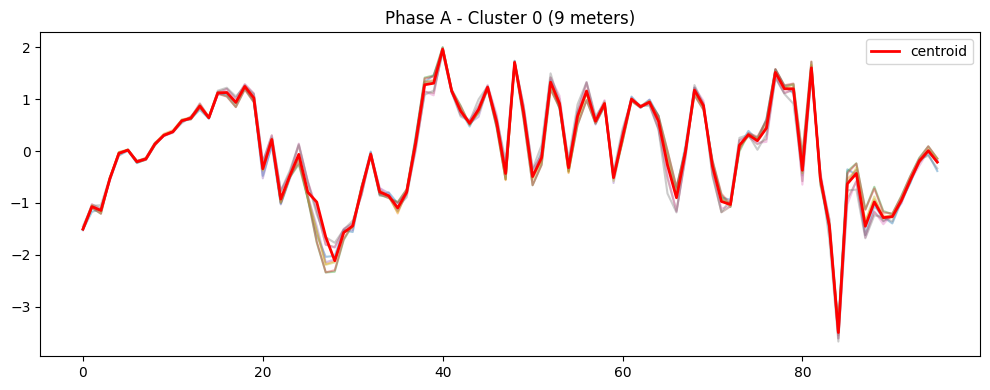

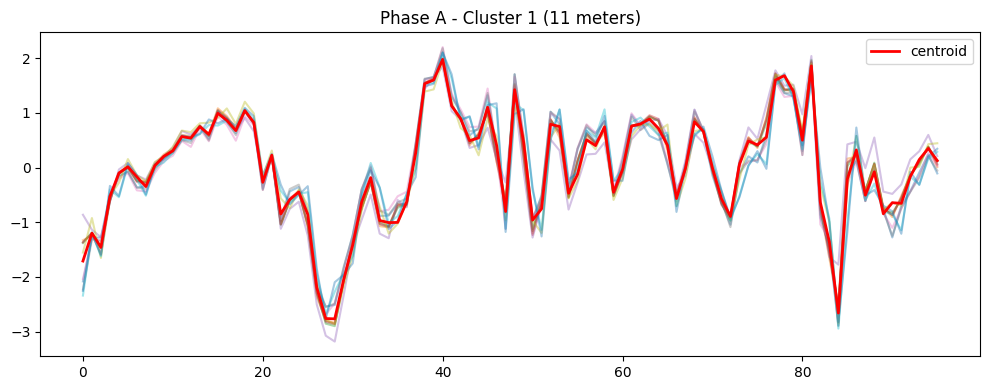

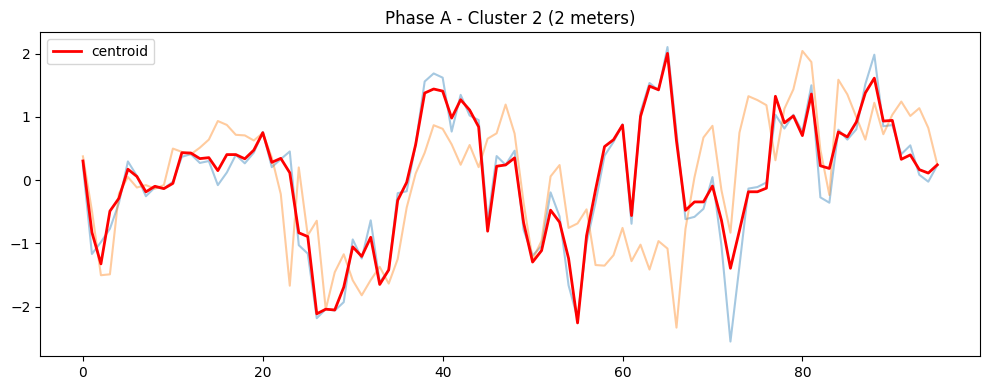

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.



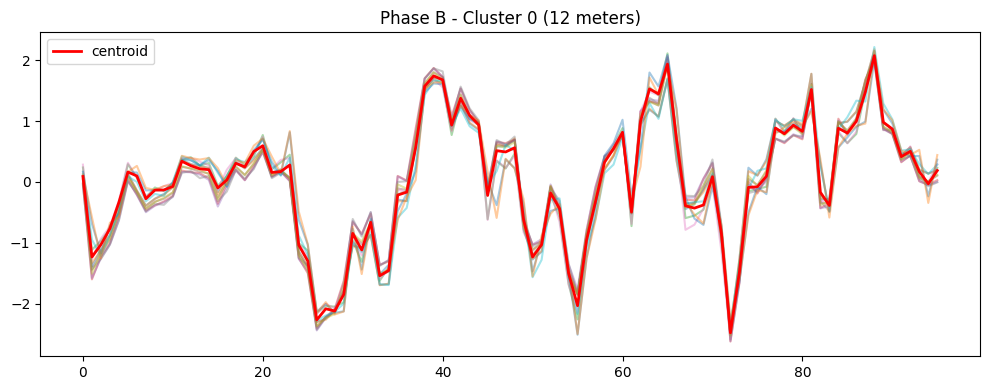

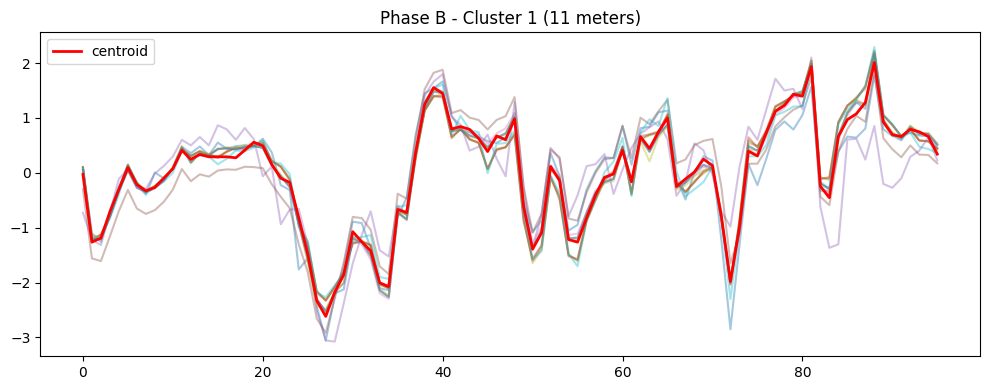

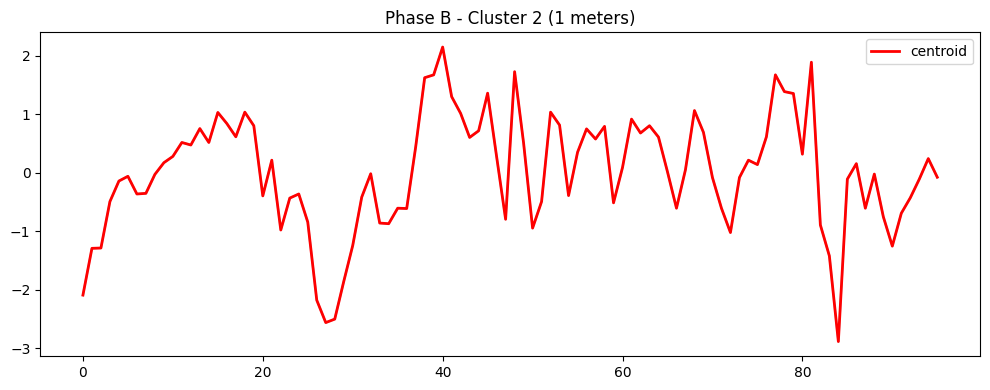

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.



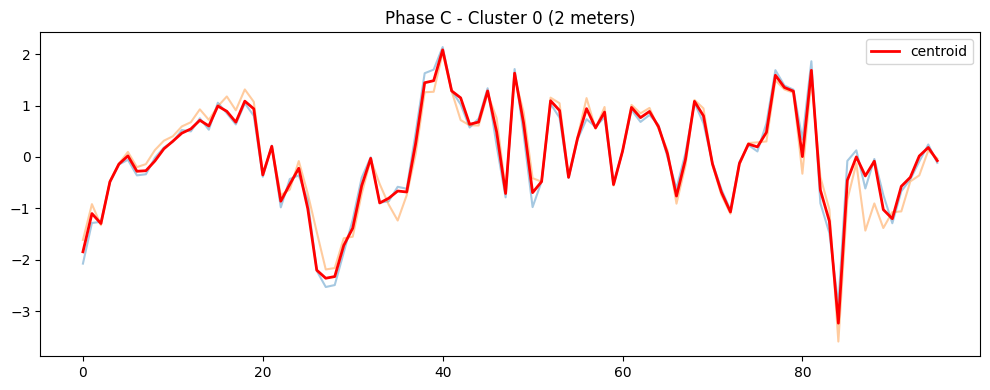

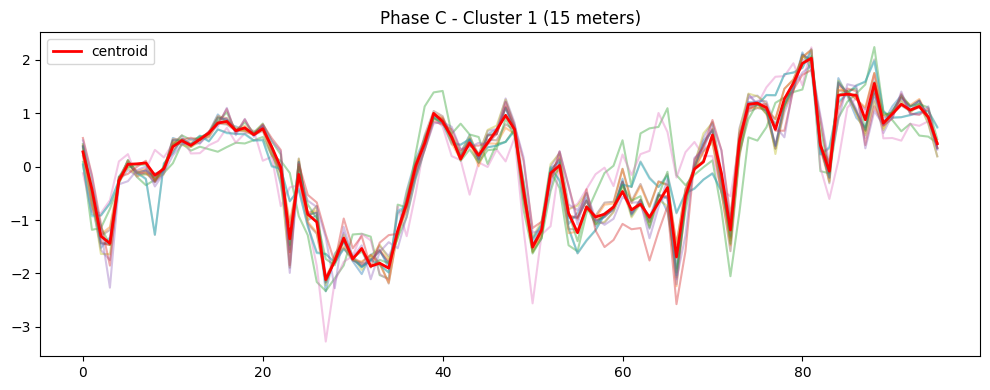

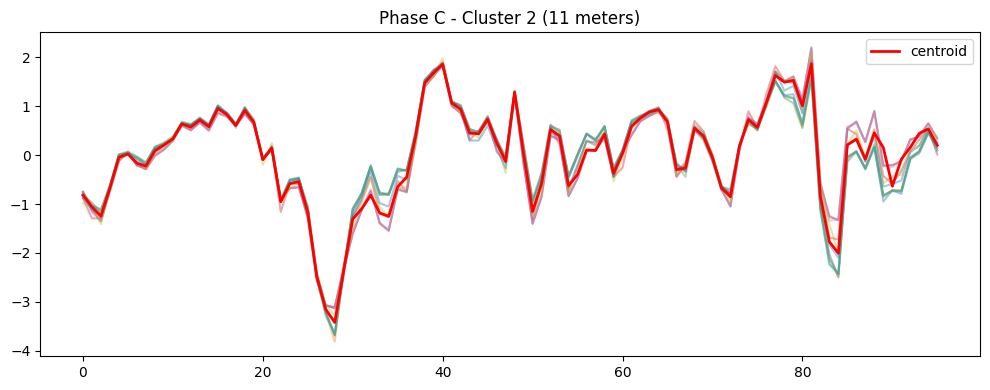

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning:

'force_all


--- ตรวจ Phase A ---
- MT0041 อาจอยู่ผิด phase (A) → ควรเป็น Phase B
- MT0080 อาจอยู่ผิด phase (A) → ควรเป็น Phase C

--- ตรวจ Phase B ---
- MT0027 อาจอยู่ผิด phase (B) → ควรเป็น Phase C
- MT0038 อาจอยู่ผิด phase (B) → ควรเป็น Phase A

--- ตรวจ Phase C ---
- MT0005 อาจอยู่ผิด phase (C) → ควรเป็น Phase A
- MT0006 อาจอยู่ผิด phase (C) → ควรเป็น Phase A
- MT0007 อาจอยู่ผิด phase (C) → ควรเป็น Phase A
- MT0019 อาจอยู่ผิด phase (C) → ควรเป็น Phase A
- MT0026 อาจอยู่ผิด phase (C) → ควรเป็น Phase B
- MT0042 อาจอยู่ผิด phase (C) → ควรเป็น Phase A
- MT0049 อาจอยู่ผิด phase (C) → ควรเป็น Phase A
- MT0050 อาจอยู่ผิด phase (C) → ควรเป็น Phase A
- MT0057 อาจอยู่ผิด phase (C) → ควรเป็น Phase A
- MT0059 อาจอยู่ผิด phase (C) → ควรเป็น Phase A
- MT0076 อาจอยู่ผิด phase (C) → ควรเป็น Phase A

========================= วันที่ 2025-02-04 =========================


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.



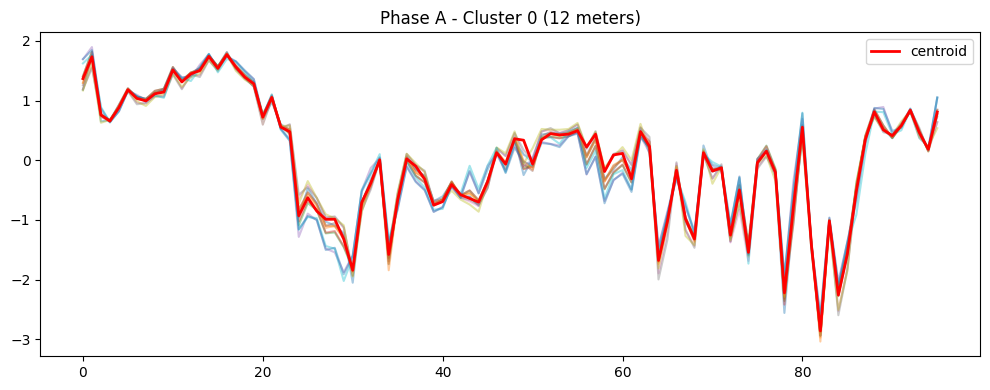

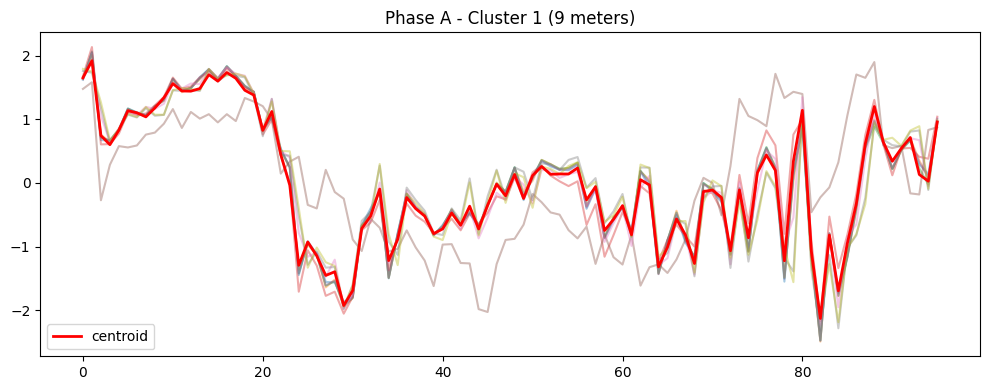

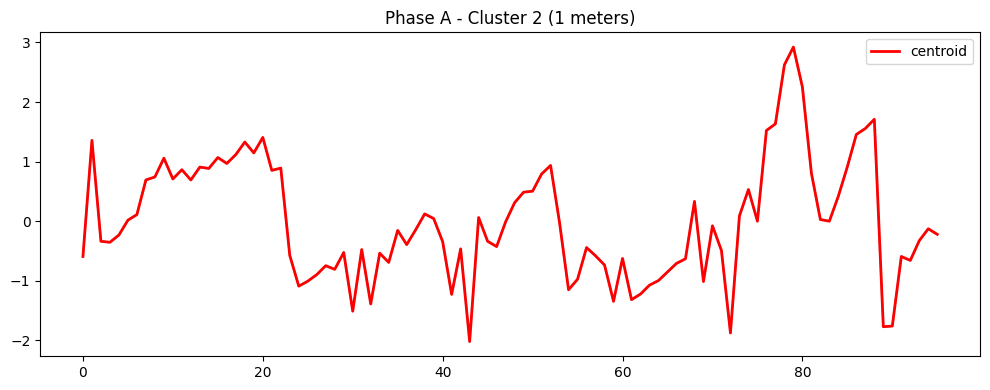

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.



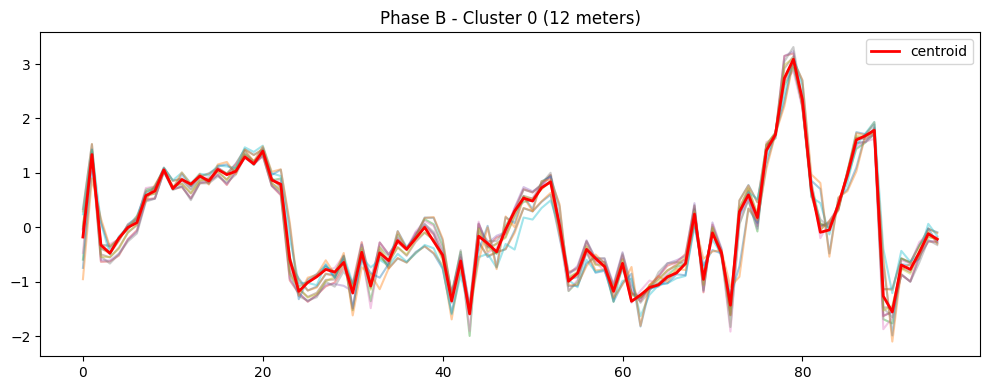

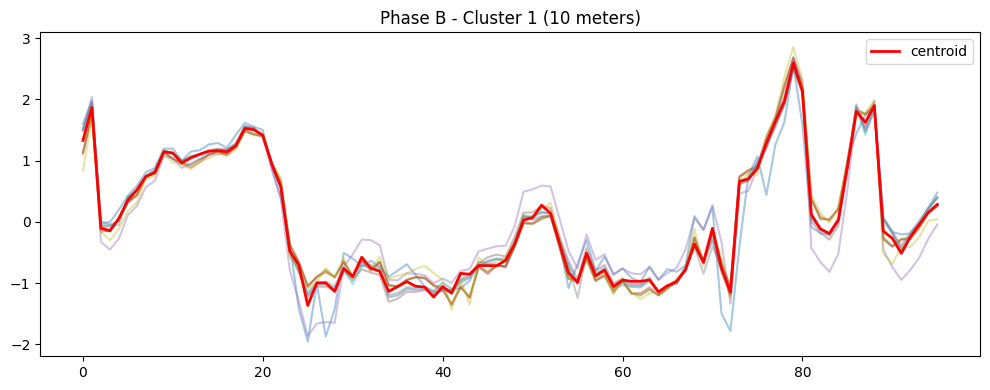

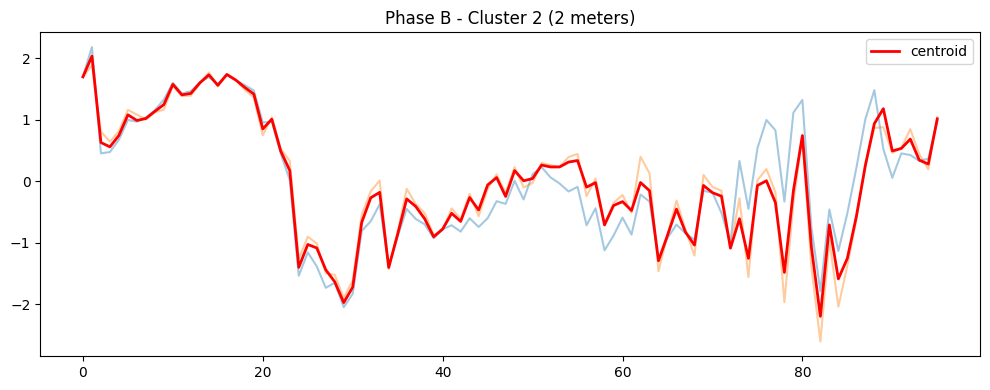

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.



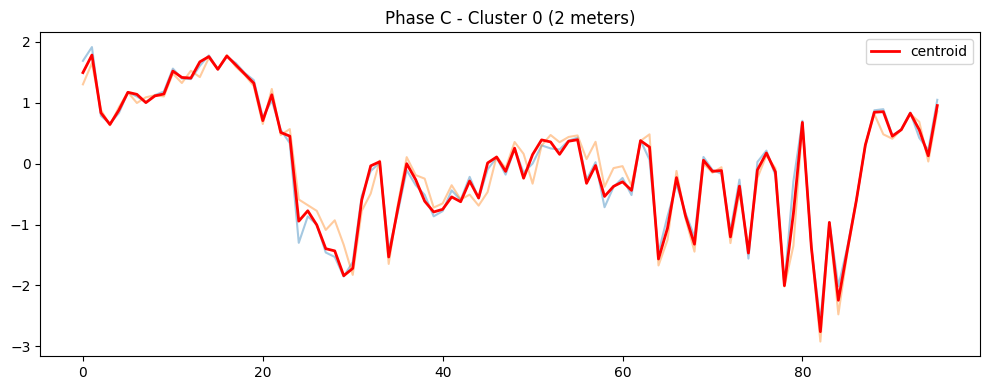

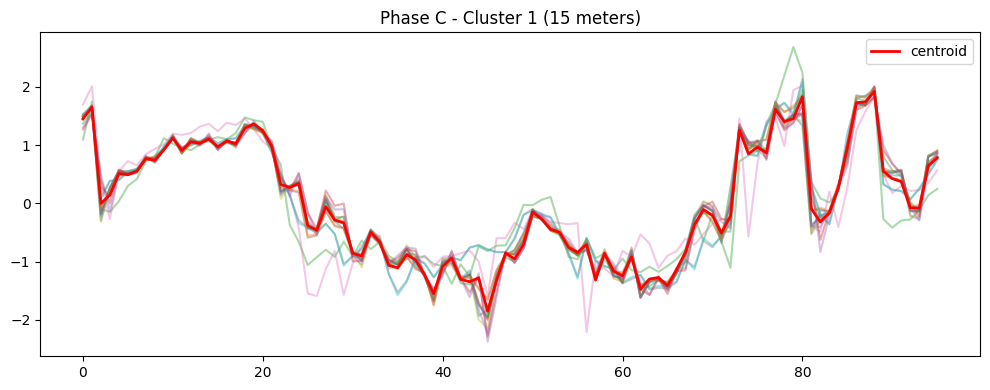

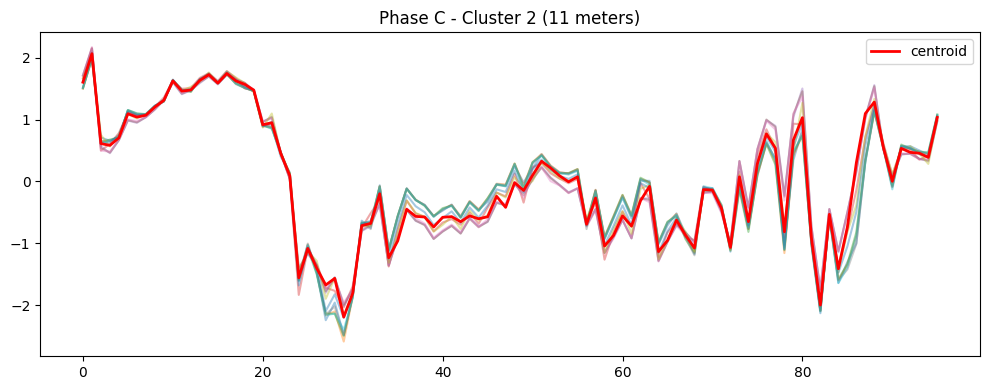

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning:

'force_all


--- ตรวจ Phase A ---
- MT0041 อาจอยู่ผิด phase (A) → ควรเป็น Phase B
- MT0080 อาจอยู่ผิด phase (A) → ควรเป็น Phase C

--- ตรวจ Phase B ---


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.



- MT0027 อาจอยู่ผิด phase (B) → ควรเป็น Phase C
- MT0038 อาจอยู่ผิด phase (B) → ควรเป็น Phase A

--- ตรวจ Phase C ---
- MT0005 อาจอยู่ผิด phase (C) → ควรเป็น Phase A
- MT0006 อาจอยู่ผิด phase (C) → ควรเป็น Phase A
- MT0007 อาจอยู่ผิด phase (C) → ควรเป็น Phase A
- MT0019 อาจอยู่ผิด phase (C) → ควรเป็น Phase A
- MT0026 อาจอยู่ผิด phase (C) → ควรเป็น Phase B
- MT0042 อาจอยู่ผิด phase (C) → ควรเป็น Phase A
- MT0049 อาจอยู่ผิด phase (C) → ควรเป็น Phase A
- MT0050 อาจอยู่ผิด phase (C) → ควรเป็น Phase A
- MT0057 อาจอยู่ผิด phase (C) → ควรเป็น Phase A
- MT0059 อาจอยู่ผิด phase (C) → ควรเป็น Phase A
- MT0076 อาจอยู่ผิด phase (C) → ควรเป็น Phase A

========================= วันที่ 2025-02-01 =========================


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.



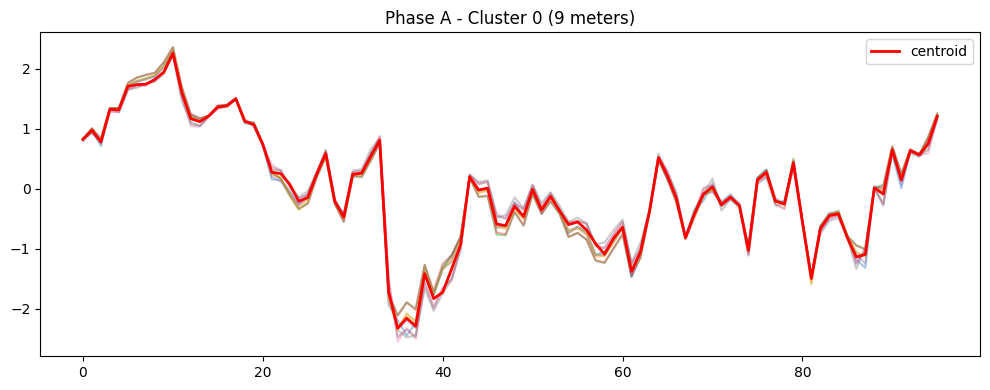

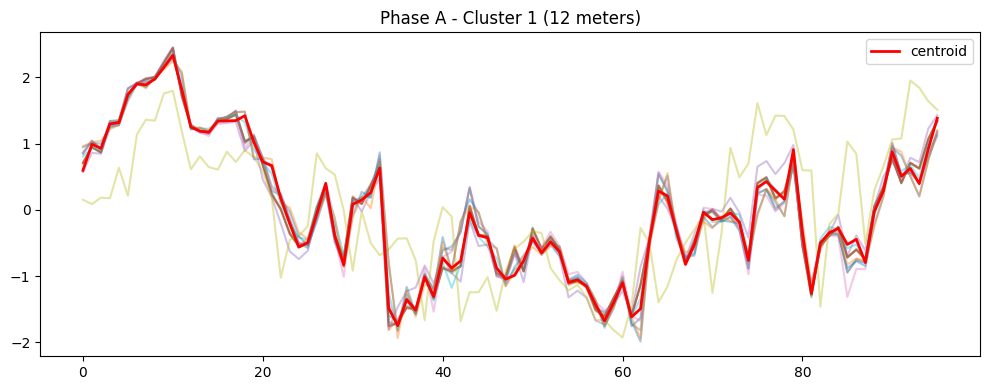

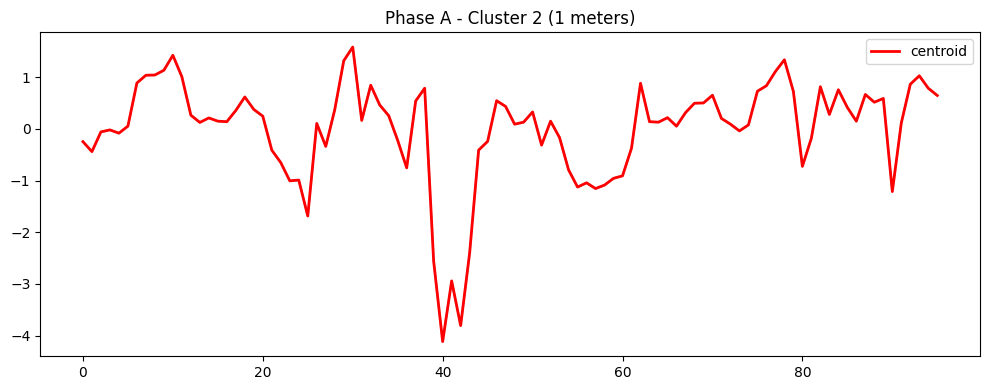

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.



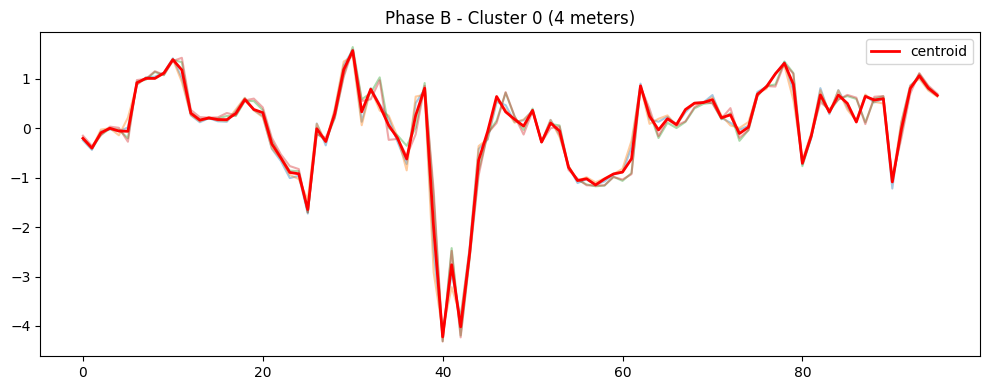

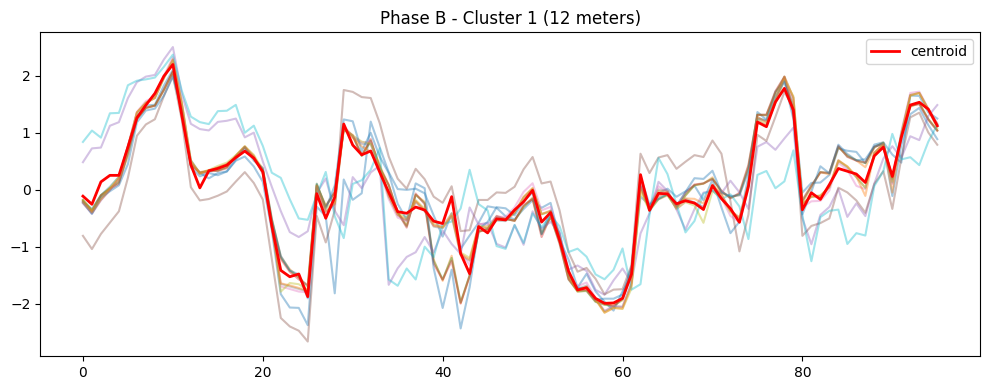

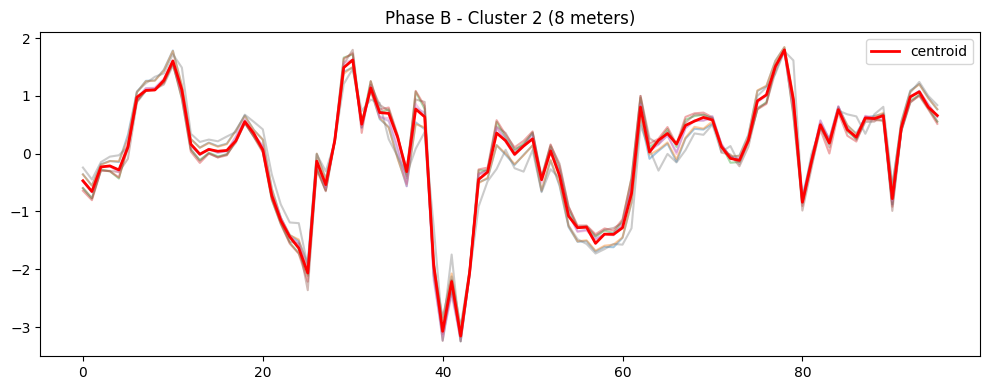

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.



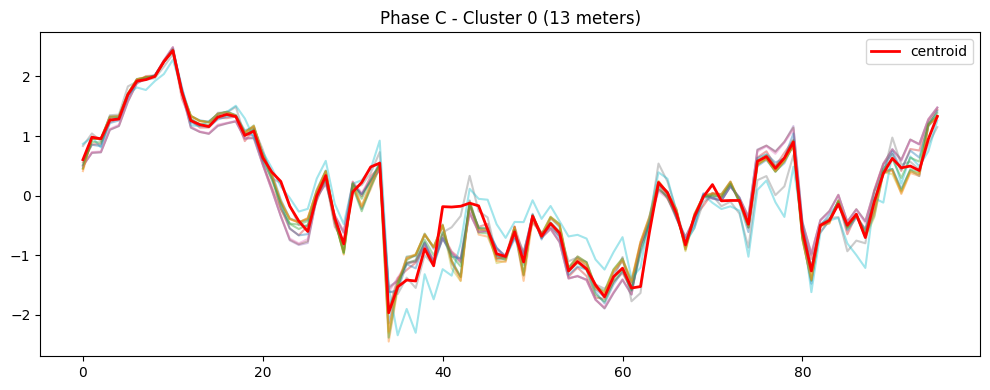

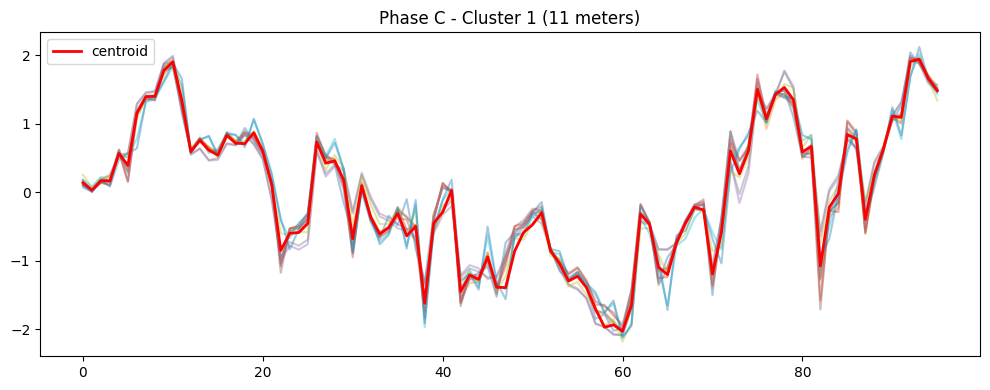

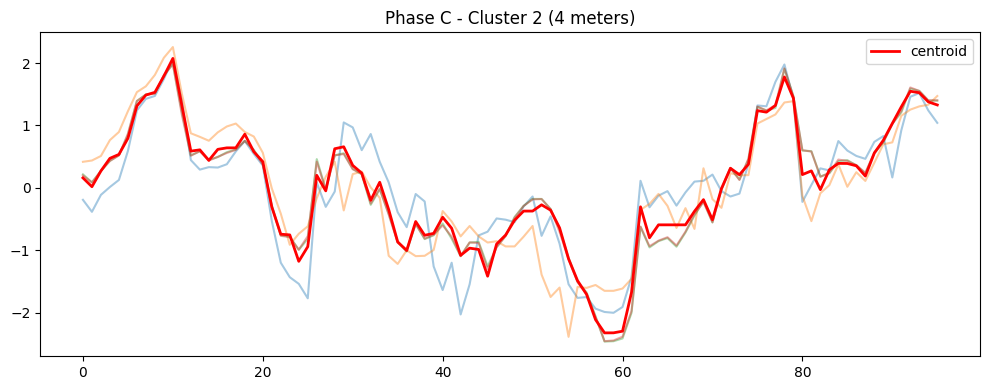

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning:

'force_all


--- ตรวจ Phase A ---
- MT0041 อาจอยู่ผิด phase (A) → ควรเป็น Phase B
- MT0080 อาจอยู่ผิด phase (A) → ควรเป็น Phase C

--- ตรวจ Phase B ---
- MT0027 อาจอยู่ผิด phase (B) → ควรเป็น Phase C
- MT0038 อาจอยู่ผิด phase (B) → ควรเป็น Phase A

--- ตรวจ Phase C ---
- MT0005 อาจอยู่ผิด phase (C) → ควรเป็น Phase A
- MT0006 อาจอยู่ผิด phase (C) → ควรเป็น Phase A
- MT0007 อาจอยู่ผิด phase (C) → ควรเป็น Phase A
- MT0019 อาจอยู่ผิด phase (C) → ควรเป็น Phase A
- MT0026 อาจอยู่ผิด phase (C) → ควรเป็น Phase B
- MT0042 อาจอยู่ผิด phase (C) → ควรเป็น Phase A
- MT0049 อาจอยู่ผิด phase (C) → ควรเป็น Phase A
- MT0050 อาจอยู่ผิด phase (C) → ควรเป็น Phase A
- MT0057 อาจอยู่ผิด phase (C) → ควรเป็น Phase A
- MT0059 อาจอยู่ผิด phase (C) → ควรเป็น Phase A
- MT0076 อาจอยู่ผิด phase (C) → ควรเป็น Phase A

========================= วันที่ 2025-02-24 =========================


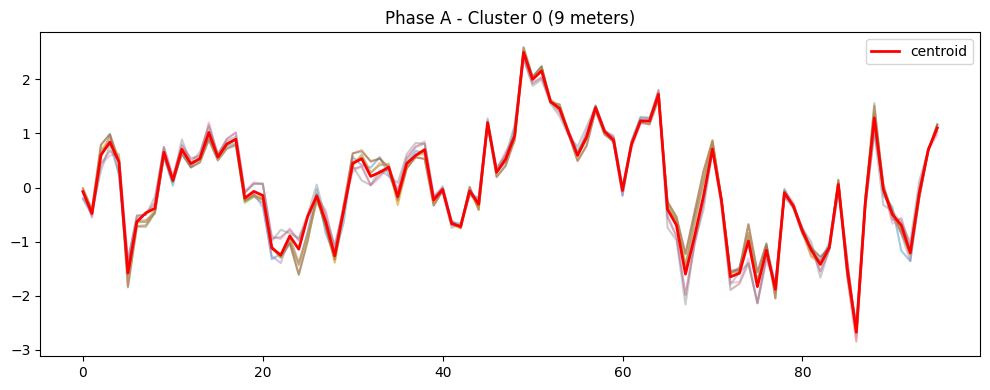

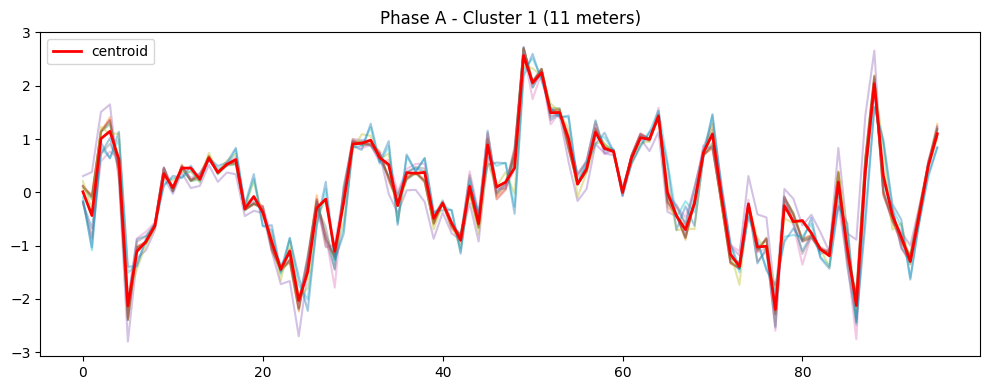

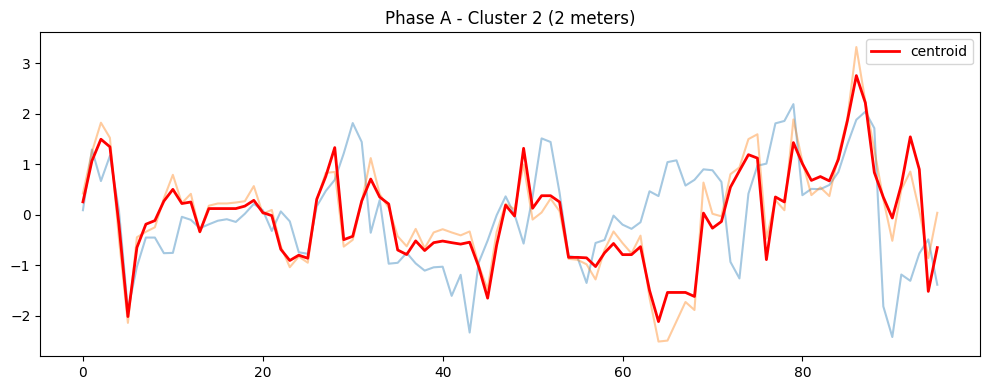

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.



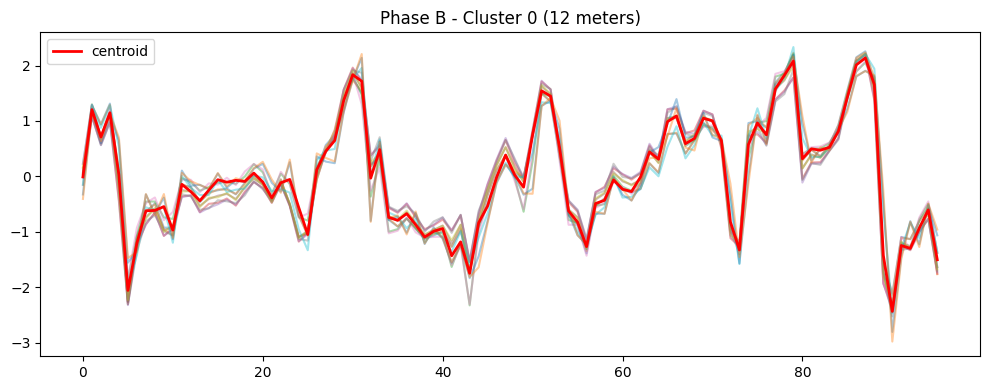

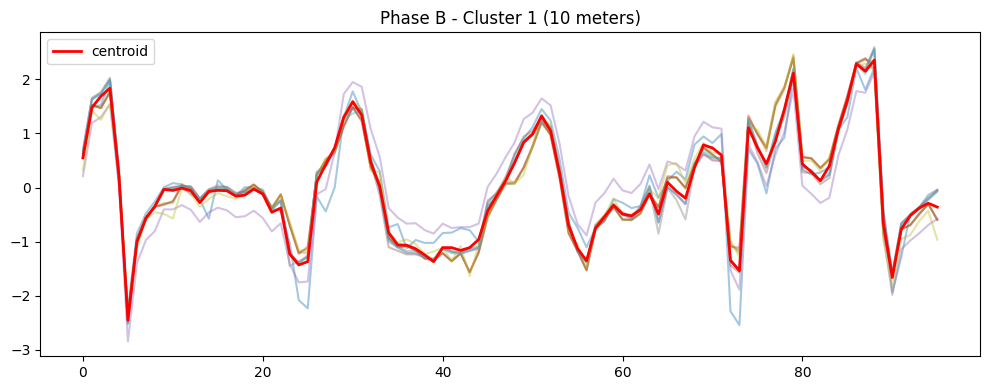

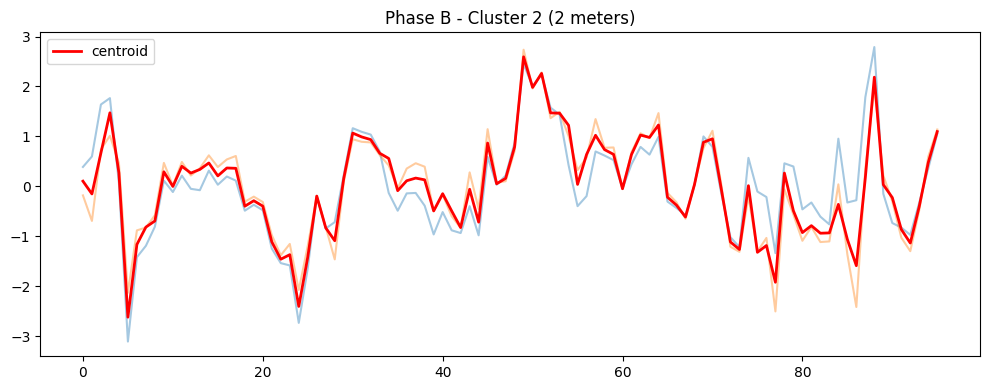

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.



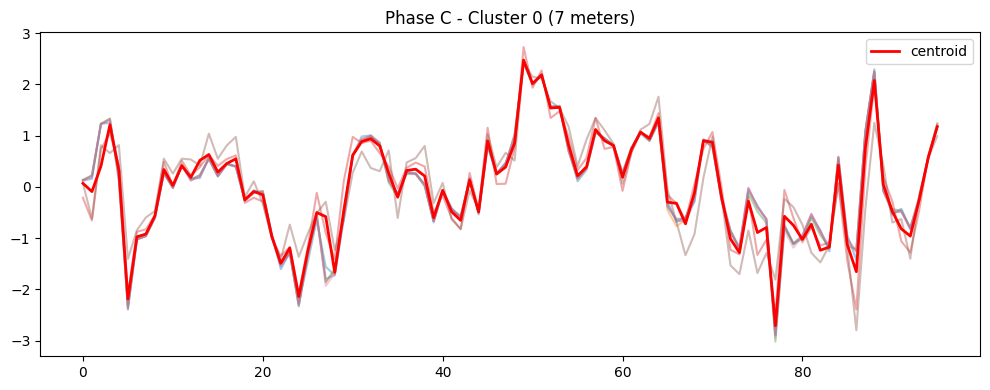

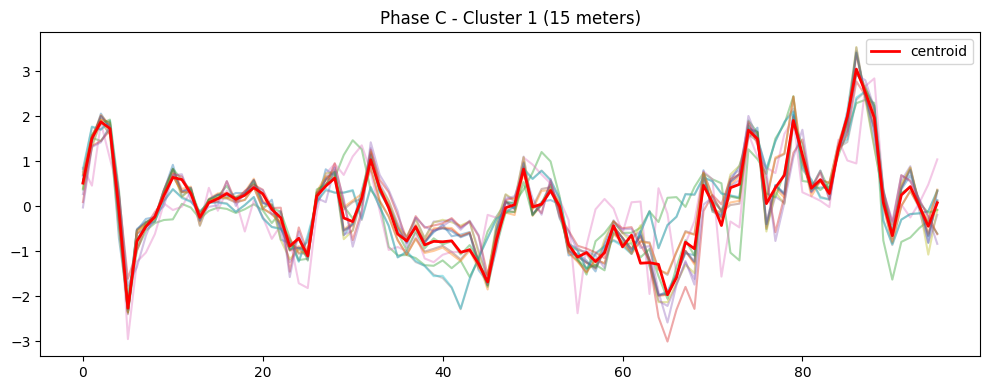

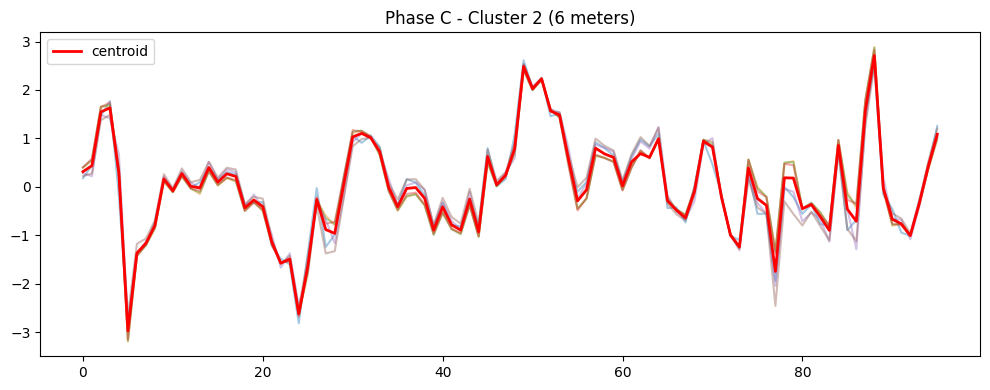

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning:

'force_all


--- ตรวจ Phase A ---
- MT0041 อาจอยู่ผิด phase (A) → ควรเป็น Phase B
- MT0080 อาจอยู่ผิด phase (A) → ควรเป็น Phase C

--- ตรวจ Phase B ---
- MT0027 อาจอยู่ผิด phase (B) → ควรเป็น Phase C
- MT0038 อาจอยู่ผิด phase (B) → ควรเป็น Phase A

--- ตรวจ Phase C ---
- MT0005 อาจอยู่ผิด phase (C) → ควรเป็น Phase A
- MT0006 อาจอยู่ผิด phase (C) → ควรเป็น Phase A
- MT0007 อาจอยู่ผิด phase (C) → ควรเป็น Phase A
- MT0019 อาจอยู่ผิด phase (C) → ควรเป็น Phase A
- MT0026 อาจอยู่ผิด phase (C) → ควรเป็น Phase B
- MT0042 อาจอยู่ผิด phase (C) → ควรเป็น Phase A
- MT0049 อาจอยู่ผิด phase (C) → ควรเป็น Phase A
- MT0050 อาจอยู่ผิด phase (C) → ควรเป็น Phase A
- MT0057 อาจอยู่ผิด phase (C) → ควรเป็น Phase A
- MT0059 อาจอยู่ผิด phase (C) → ควรเป็น Phase A
- MT0076 อาจอยู่ผิด phase (C) → ควรเป็น Phase A

========================= วันที่ 2025-02-09 =========================


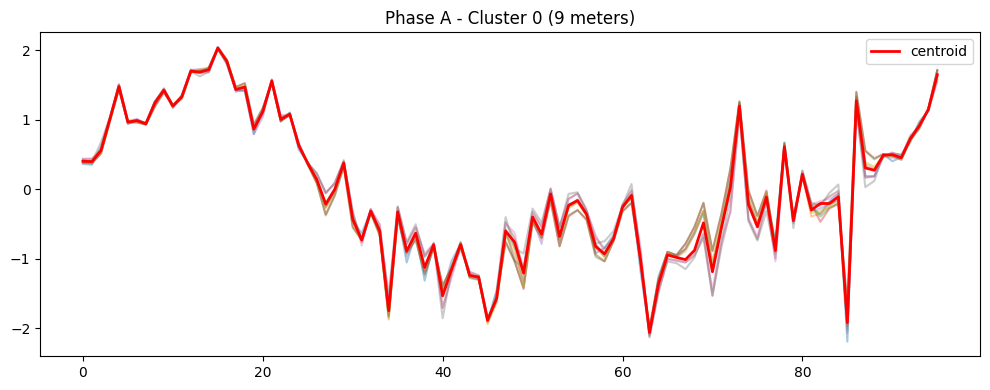

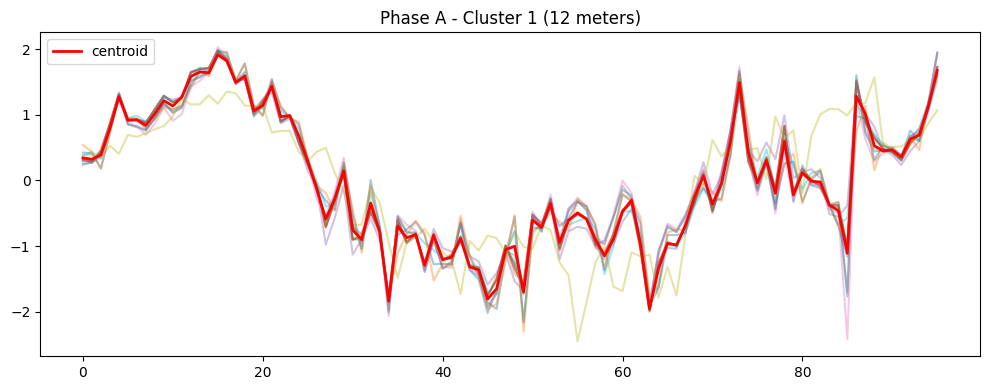

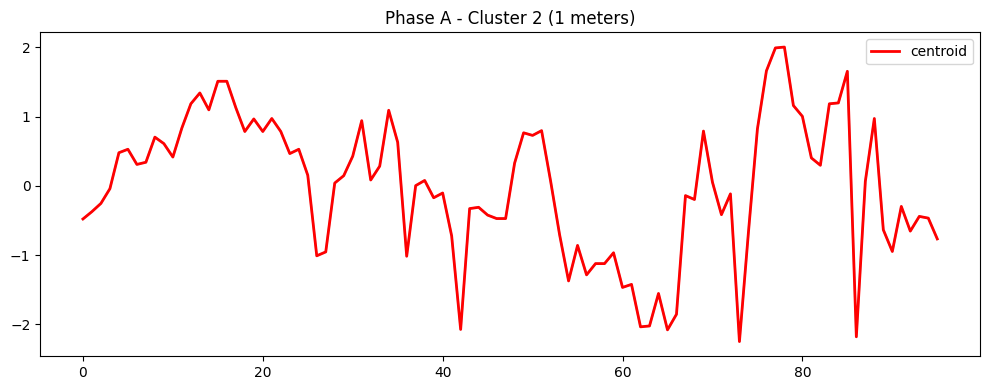

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.



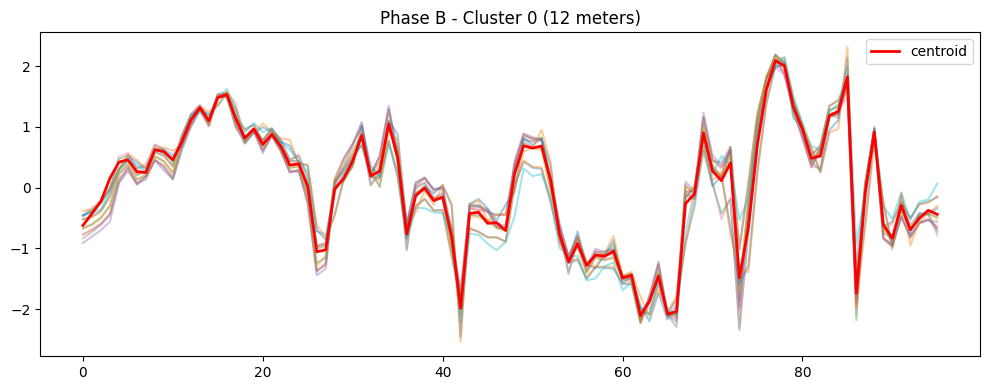

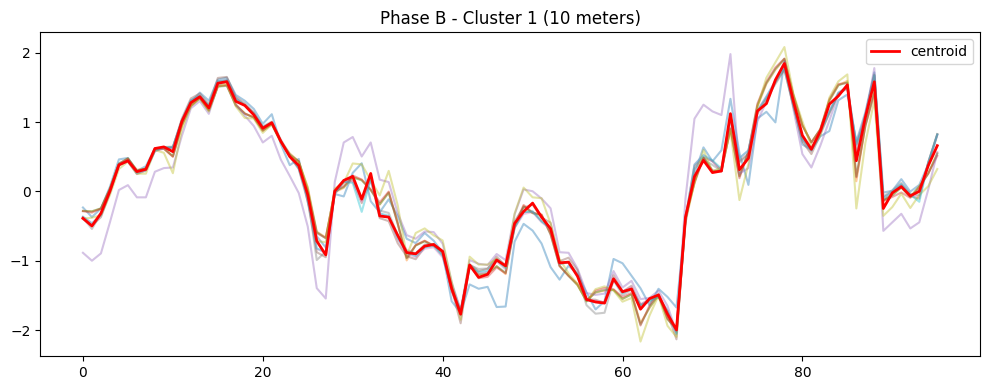

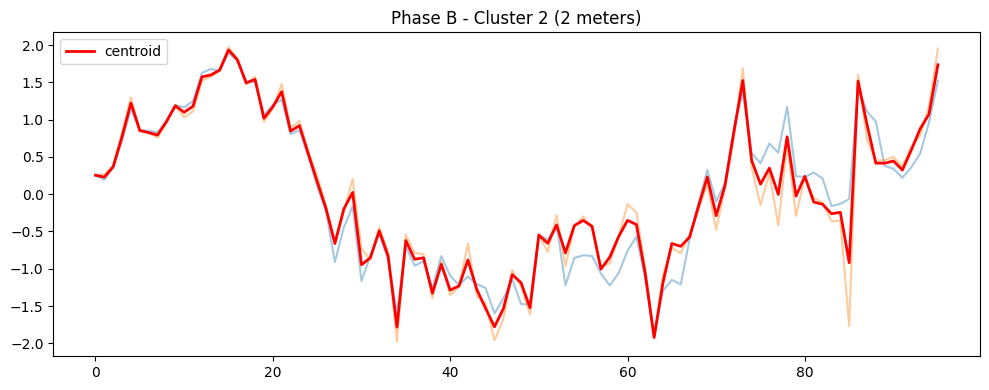

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.



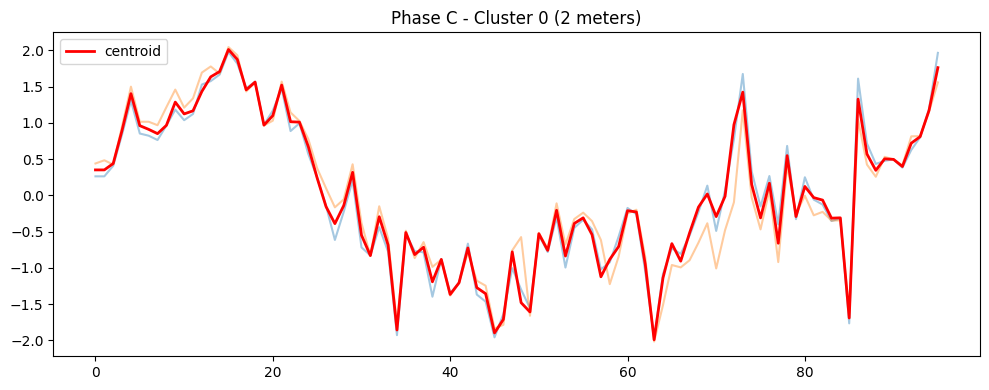

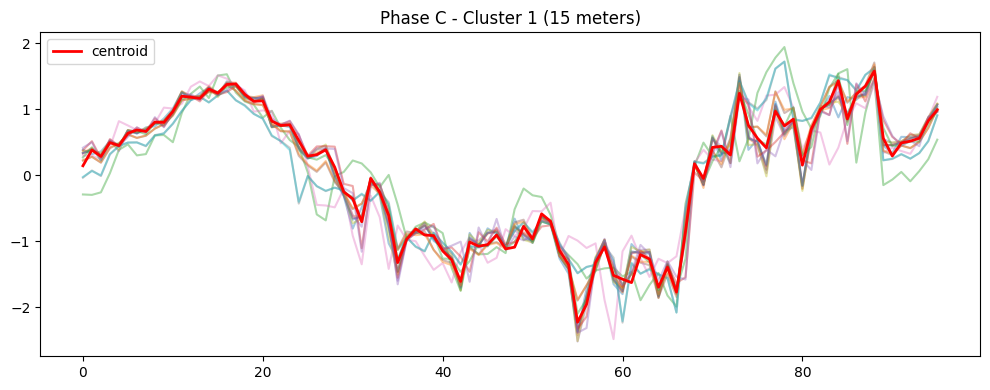

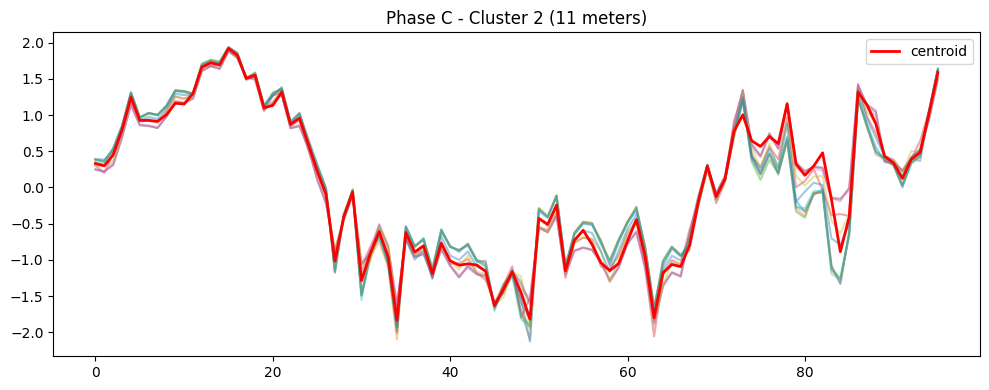


--- ตรวจ Phase A ---
- MT0041 อาจอยู่ผิด phase (A) → ควรเป็น Phase B
- MT0080 อาจอยู่ผิด phase (A) → ควรเป็น Phase C

--- ตรวจ Phase B ---
- MT0008 อาจอยู่ผิด phase (B) → ควรเป็น Phase C
- MT0027 อาจอยู่ผิด phase (B) → ควรเป็น Phase C
- MT0038 อาจอยู่ผิด phase (B) → ควรเป็น Phase A

--- ตรวจ Phase C ---
- MT0005 อาจอยู่ผิด phase (C) → ควรเป็น Phase A
- MT0006 อาจอยู่ผิด phase (C) → ควรเป็น Phase A
- MT0007 อาจอยู่ผิด phase (C) → ควรเป็น Phase A
- MT0019 อาจอยู่ผิด phase (C) → ควรเป็น Phase A
- MT0026 อาจอยู่ผิด phase (C) → ควรเป็น Phase B
- MT0042 อาจอยู่ผิด phase (C) → ควรเป็น Phase A
- MT0049 อาจอยู่ผิด phase (C) → ควรเป็น Phase A
- MT0050 อาจอยู่ผิด phase (C) → ควรเป็น Phase A
- MT0057 อาจอยู่ผิด phase (C) → ควรเป็น Phase A
- MT0059 อาจอยู่ผิด phase (C) → ควรเป็น Phase A
- MT0076 อาจอยู่ผิด phase (C) → ควรเป็น Phase A


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning:

'force_all

In [ ]:
import random

# --- สมมุติว่า voltage_df มีคอลัมน์ full_time เป็น datetime แล้ว ---
voltage_df['date'] = voltage_df['date_time'].dt.date
voltage_df['full_time'] = pd.to_datetime(voltage_df['date_time'].dt.date.astype(str) + ' ' + voltage_df['time']) # Added this line to create the full_time column

# --- 1. ตรวจวันทั้งหมดที่มีครบ 3 phase ---
valid_dates = []
for d in voltage_df['date'].unique():
    phases = voltage_df[voltage_df['date'] == d]['system_phase'].unique()
    if all(p in phases for p in ['A', 'B', 'C']):
        valid_dates.append(d)

# --- 2. สุ่มเลือก 5 วัน ---
random.seed(42)
sample_dates = random.sample(valid_dates, 5)

# --- 3. วิเคราะห์แยกรายวัน ---
for i, selected_date in enumerate(sample_dates, start=1):
    print(f"\n========================= วันที่ {selected_date} =========================")

    # Filter เฉพาะข้อมูลของวันนั้น
    df_day = voltage_df[voltage_df['date'] == selected_date].copy()

    # เรียกฟังก์ชัน clustering สำหรับแต่ละ phase
    result_A = cluster_phase_voltage(df_day, phase_label='A')
    result_B = cluster_phase_voltage(df_day, phase_label='B')
    result_C = cluster_phase_voltage(df_day, phase_label='C')

    # รวมผลลัพธ์แต่ละ phase
    results_dict = {
        'A': result_A,
        'B': result_B,
        'C': result_C
    }

    # ตรวจว่าใครอยู่ผิด phase
    _ = detect_phase_mismatch(df_day, results_dict)

In [ ]:
import pandas as pd
import numpy as np
import random
from tslearn.clustering import TimeSeriesKMeans
from tslearn.preprocessing import TimeSeriesScalerMeanVariance
from tslearn.metrics import dtw

# --- เตรียมข้อมูล ---
voltage_df['date'] = voltage_df['full_time'].dt.date

# --- เลือกวันจากที่มีครบทั้ง 3 phase ---
valid_dates = []
for d in voltage_df['date'].unique():
    phases = voltage_df[voltage_df['date'] == d]['system_phase'].unique()
    if all(p in phases for p in ['A', 'B', 'C']):
        valid_dates.append(d)

# --- สุ่มเลือก 5 วัน ---
random.seed(42)
sample_dates = random.sample(valid_dates, 5)


def cluster_phase_voltage(df, phase_label='A', n_clusters=3):
    df_phase = df[df['system_phase'] == phase_label]
    pivot_df = df_phase.pivot_table(index='mt_no', columns='full_time', values='voltage')
    pivot_df = pivot_df.dropna()

    scaler = TimeSeriesScalerMeanVariance()
    X_scaled = scaler.fit_transform(pivot_df.values[:, :, None])

    model = TimeSeriesKMeans(n_clusters=n_clusters, metric="dtw", random_state=0)
    labels = model.fit_predict(X_scaled)

    pivot_df['cluster'] = labels
    result_df = pivot_df[['cluster']].reset_index()
    return result_df


def detect_phase_mismatch(df_all, results_dict):
    scaler = TimeSeriesScalerMeanVariance()
    suggestions_by_phase = {}

    # เตรียม centroid ของทุก phase
    centroids = {}
    for phase, result in results_dict.items():
        df_phase = df_all[df_all['system_phase'] == phase]
        pivot = df_phase.pivot_table(index='mt_no', columns='full_time', values='voltage').dropna()
        data = scaler.fit_transform(pivot.values[:, :, None])
        centroid = np.mean(data, axis=0)
        centroids[phase] = centroid

    # ตรวจแต่ละ phase
    for phase, result in results_dict.items():
        df_phase = df_all[df_all['system_phase'] == phase]
        pivot = df_phase.pivot_table(index='mt_no', columns='full_time', values='voltage').dropna()
        data = scaler.fit_transform(pivot.values[:, :, None])
        mismatches = []

        for i, mt_no in enumerate(pivot.index):
            series = data[i]
            distances = {ph: dtw(series, centroids[ph]) for ph in ['A', 'B', 'C']}
            nearest_phase = min(distances, key=distances.get)
            if nearest_phase != phase:
                mismatches.append((mt_no, phase, nearest_phase))

        suggestions_by_phase[phase] = mismatches

    return suggestions_by_phase


# --- วิเคราะห์แยกรายวันและแสดงผลแบบฟอร์แมต ---
for i, selected_date in enumerate(sample_dates, start=1):
    print(f"\n================= วันที่ {selected_date} =======================")

    df_day = voltage_df[voltage_df['date'] == selected_date].copy()

    # clustering
    result_A = cluster_phase_voltage(df_day, phase_label='A')
    result_B = cluster_phase_voltage(df_day, phase_label='B')
    result_C = cluster_phase_voltage(df_day, phase_label='C')
    results_dict = {'A': result_A, 'B': result_B, 'C': result_C}

    # ตรวจ phase mismatch
    mismatches = detect_phase_mismatch(df_day, results_dict)

    # แสดงผล
    for phase in ['A', 'B', 'C']:
        print(f"--- ตรวจ Phase {phase} ---")
        if mismatches[phase]:
            for mt_no, real_phase, suggested in mismatches[phase]:
                print(f"- {mt_no} อาจอยู่ผิด phase ({real_phase}) → ควรเป็น Phase {suggested}")
        else:
            print("- ไม่พบความผิดปกติ")
    print("=" * 65)



================= วันที่ 2025-02-21 =======================


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning:

'force_all

--- ตรวจ Phase A ---
- MT0041 อาจอยู่ผิด phase (A) → ควรเป็น Phase B
- MT0080 อาจอยู่ผิด phase (A) → ควรเป็น Phase C
--- ตรวจ Phase B ---
- MT0027 อาจอยู่ผิด phase (B) → ควรเป็น Phase C
- MT0038 อาจอยู่ผิด phase (B) → ควรเป็น Phase A
--- ตรวจ Phase C ---
- MT0005 อาจอยู่ผิด phase (C) → ควรเป็น Phase A
- MT0006 อาจอยู่ผิด phase (C) → ควรเป็น Phase A
- MT0007 อาจอยู่ผิด phase (C) → ควรเป็น Phase A
- MT0019 อาจอยู่ผิด phase (C) → ควรเป็น Phase A
- MT0026 อาจอยู่ผิด phase (C) → ควรเป็น Phase B
- MT0042 อาจอยู่ผิด phase (C) → ควรเป็น Phase A
- MT0049 อาจอยู่ผิด phase (C) → ควรเป็น Phase A
- MT0050 อาจอยู่ผิด phase (C) → ควรเป็น Phase A
- MT0057 อาจอยู่ผิด phase (C) → ควรเป็น Phase A
- MT0059 อาจอยู่ผิด phase (C) → ควรเป็น Phase A
- MT0076 อาจอยู่ผิด phase (C) → ควรเป็น Phase A

================= วันที่ 2025-02-04 =======================


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning:

'force_all

--- ตรวจ Phase A ---
- MT0041 อาจอยู่ผิด phase (A) → ควรเป็น Phase B
- MT0080 อาจอยู่ผิด phase (A) → ควรเป็น Phase C
--- ตรวจ Phase B ---
- MT0027 อาจอยู่ผิด phase (B) → ควรเป็น Phase C
- MT0038 อาจอยู่ผิด phase (B) → ควรเป็น Phase A
--- ตรวจ Phase C ---
- MT0005 อาจอยู่ผิด phase (C) → ควรเป็น Phase A
- MT0006 อาจอยู่ผิด phase (C) → ควรเป็น Phase A
- MT0007 อาจอยู่ผิด phase (C) → ควรเป็น Phase A
- MT0019 อาจอยู่ผิด phase (C) → ควรเป็น Phase A
- MT0026 อาจอยู่ผิด phase (C) → ควรเป็น Phase B
- MT0042 อาจอยู่ผิด phase (C) → ควรเป็น Phase A
- MT0049 อาจอยู่ผิด phase (C) → ควรเป็น Phase A
- MT0050 อาจอยู่ผิด phase (C) → ควรเป็น Phase A
- MT0057 อาจอยู่ผิด phase (C) → ควรเป็น Phase A
- MT0059 อาจอยู่ผิด phase (C) → ควรเป็น Phase A
- MT0076 อาจอยู่ผิด phase (C) → ควรเป็น Phase A

================= วันที่ 2025-02-01 =======================


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning:

'force_all

--- ตรวจ Phase A ---
- MT0041 อาจอยู่ผิด phase (A) → ควรเป็น Phase B
- MT0080 อาจอยู่ผิด phase (A) → ควรเป็น Phase C
--- ตรวจ Phase B ---
- MT0027 อาจอยู่ผิด phase (B) → ควรเป็น Phase C
- MT0038 อาจอยู่ผิด phase (B) → ควรเป็น Phase A
--- ตรวจ Phase C ---
- MT0005 อาจอยู่ผิด phase (C) → ควรเป็น Phase A
- MT0006 อาจอยู่ผิด phase (C) → ควรเป็น Phase A
- MT0007 อาจอยู่ผิด phase (C) → ควรเป็น Phase A
- MT0019 อาจอยู่ผิด phase (C) → ควรเป็น Phase A
- MT0026 อาจอยู่ผิด phase (C) → ควรเป็น Phase B
- MT0042 อาจอยู่ผิด phase (C) → ควรเป็น Phase A
- MT0049 อาจอยู่ผิด phase (C) → ควรเป็น Phase A
- MT0050 อาจอยู่ผิด phase (C) → ควรเป็น Phase A
- MT0057 อาจอยู่ผิด phase (C) → ควรเป็น Phase A
- MT0059 อาจอยู่ผิด phase (C) → ควรเป็น Phase A
- MT0076 อาจอยู่ผิด phase (C) → ควรเป็น Phase A

================= วันที่ 2025-02-24 =======================


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning:

'force_all

--- ตรวจ Phase A ---
- MT0041 อาจอยู่ผิด phase (A) → ควรเป็น Phase B
- MT0080 อาจอยู่ผิด phase (A) → ควรเป็น Phase C
--- ตรวจ Phase B ---
- MT0027 อาจอยู่ผิด phase (B) → ควรเป็น Phase C
- MT0038 อาจอยู่ผิด phase (B) → ควรเป็น Phase A
--- ตรวจ Phase C ---
- MT0005 อาจอยู่ผิด phase (C) → ควรเป็น Phase A
- MT0006 อาจอยู่ผิด phase (C) → ควรเป็น Phase A
- MT0007 อาจอยู่ผิด phase (C) → ควรเป็น Phase A
- MT0019 อาจอยู่ผิด phase (C) → ควรเป็น Phase A
- MT0026 อาจอยู่ผิด phase (C) → ควรเป็น Phase B
- MT0042 อาจอยู่ผิด phase (C) → ควรเป็น Phase A
- MT0049 อาจอยู่ผิด phase (C) → ควรเป็น Phase A
- MT0050 อาจอยู่ผิด phase (C) → ควรเป็น Phase A
- MT0057 อาจอยู่ผิด phase (C) → ควรเป็น Phase A
- MT0059 อาจอยู่ผิด phase (C) → ควรเป็น Phase A
- MT0076 อาจอยู่ผิด phase (C) → ควรเป็น Phase A

================= วันที่ 2025-02-09 =======================


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning:

'force_all

--- ตรวจ Phase A ---
- MT0041 อาจอยู่ผิด phase (A) → ควรเป็น Phase B
- MT0080 อาจอยู่ผิด phase (A) → ควรเป็น Phase C
--- ตรวจ Phase B ---
- MT0008 อาจอยู่ผิด phase (B) → ควรเป็น Phase C
- MT0027 อาจอยู่ผิด phase (B) → ควรเป็น Phase C
- MT0038 อาจอยู่ผิด phase (B) → ควรเป็น Phase A
--- ตรวจ Phase C ---
- MT0005 อาจอยู่ผิด phase (C) → ควรเป็น Phase A
- MT0006 อาจอยู่ผิด phase (C) → ควรเป็น Phase A
- MT0007 อาจอยู่ผิด phase (C) → ควรเป็น Phase A
- MT0019 อาจอยู่ผิด phase (C) → ควรเป็น Phase A
- MT0026 อาจอยู่ผิด phase (C) → ควรเป็น Phase B
- MT0042 อาจอยู่ผิด phase (C) → ควรเป็น Phase A
- MT0049 อาจอยู่ผิด phase (C) → ควรเป็น Phase A
- MT0050 อาจอยู่ผิด phase (C) → ควรเป็น Phase A
- MT0057 อาจอยู่ผิด phase (C) → ควรเป็น Phase A
- MT0059 อาจอยู่ผิด phase (C) → ควรเป็น Phase A
- MT0076 อาจอยู่ผิด phase (C) → ควรเป็น Phase A


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning:

'force_all

### Do all month

#### function

In [ ]:
# ฟังก์ชัน clustering
def cluster_phase_voltage(df, phase_label='A', n_clusters=3):
    df_phase = df[df['system_phase'] == phase_label]
    pivot_df = df_phase.pivot_table(index='mt_no', columns='full_time', values='voltage')
    pivot_df = pivot_df.dropna()

    scaler = TimeSeriesScalerMeanVariance()
    X_scaled = scaler.fit_transform(pivot_df.values[:, :, None])

    model = TimeSeriesKMeans(n_clusters=n_clusters, metric="dtw", random_state=0)
    labels = model.fit_predict(X_scaled)

    pivot_df['cluster'] = labels
    result_df = pivot_df[['cluster']].reset_index()
    return result_df



In [ ]:
# ฟังก์ชันตรวจ mismatch → return เป็น dict: {mt_no: suggested_phase}
def detect_phase_mismatch(df_all, results_dict):
    scaler = TimeSeriesScalerMeanVariance()
    suggestions = {}

    # สร้าง centroid
    centroids = {}
    for phase in ['A', 'B', 'C']:
        df_phase = df_all[df_all['system_phase'] == phase]
        pivot = df_phase.pivot_table(index='mt_no', columns='full_time', values='voltage').dropna()
        if len(pivot) == 0:
            continue
        data = scaler.fit_transform(pivot.values[:, :, None])
        centroid = np.mean(data, axis=0)
        centroids[phase] = centroid

    # ตรวจแต่ละ phase
    for phase in ['A', 'B', 'C']:
        df_phase = df_all[df_all['system_phase'] == phase]
        pivot = df_phase.pivot_table(index='mt_no', columns='full_time', values='voltage').dropna()
        if len(pivot) == 0:
            continue
        data = scaler.fit_transform(pivot.values[:, :, None])

        for i, mt_no in enumerate(pivot.index):
            series = data[i]
            distances = {ph: dtw(series, centroids[ph]) for ph in ['A', 'B', 'C']}
            nearest_phase = min(distances, key=distances.get)

            # เพิ่มลง dict (ถ้าผิด หรือบันทึกว่าเหมือนเดิม)
            suggestions[mt_no] = nearest_phase

    return suggestions


In [ ]:
import pandas as pd
import numpy as np
from tslearn.clustering import TimeSeriesKMeans
from tslearn.preprocessing import TimeSeriesScalerMeanVariance
from tslearn.metrics import dtw

# --- เตรียมข้อมูลหลัก ---
voltage_df['date'] = voltage_df['full_time'].dt.date

# หาวันที่ที่มีครบทั้ง 3 phase
valid_dates = []
for d in voltage_df['date'].unique():
    phases = voltage_df[voltage_df['date'] == d]['system_phase'].unique()
    if all(p in phases for p in ['A', 'B', 'C']):
        valid_dates.append(d)

# --- เริ่มวิเคราะห์ทุกวัน ---
records = []

for current_date in sorted(valid_dates):
    df_day = voltage_df[voltage_df['date'] == current_date].copy()

    # clustering
    result_A = cluster_phase_voltage(df_day, phase_label='A')
    result_B = cluster_phase_voltage(df_day, phase_label='B')
    result_C = cluster_phase_voltage(df_day, phase_label='C')
    results_dict = {'A': result_A, 'B': result_B, 'C': result_C}

    # detect suggestion
    suggest_map = detect_phase_mismatch(df_day, results_dict)

    # รวมผลทีละ row
    for mt_no in df_day['mt_no'].unique():
        df_mt = df_day[df_day['mt_no'] == mt_no]
        current_phase = df_mt['system_phase'].iloc[0]
        suggest_phase = suggest_map.get(mt_no, current_phase)  # ถ้าไม่มีใน suggest ให้ถือว่าไม่ผิด

        full_time = df_mt['full_time'].min()  # เอาเวลาที่เริ่มต้นช่วงนั้น
        records.append({
            'full_time': full_time,
            'mt_no': mt_no,
            'current_phase': current_phase,
            'suggest_phase': suggest_phase
        })

# --- สร้าง experiment_df ---
experiment_df = pd.DataFrame(records)


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning:

'force_all

In [ ]:
result_B

full_time   mt_no  cluster
0          MT0008        2
1          MT0022        2
2          MT0023        2
3          MT0024        2
4          MT0027        2
5          MT0028        2
6          MT0029        2
7          MT0032        0
8          MT0033        0
9          MT0035        2
10         MT0036        2
11         MT0038        2
12         MT0039        0
13         MT0044        0
14         MT0046        0
15         MT0048        0
16         MT0053        2
17         MT0063        0
18         MT0072        2
19         MT0079        0
20         MT0082        0
21         MT0085        1
22         MT0091        1
23         MT0094        1

In [ ]:
experiment_df

full_time   mt_no current_phase suggest_phase
0    2025-02-01  MT0054             C             C
1    2025-02-01  MT0062             C             C
2    2025-02-01  MT0008             B             B
3    2025-02-01  MT0039             B             B
4    2025-02-01  MT0043             A             A
...         ...     ...           ...           ...
1993 2025-02-27  MT0091             B             C
1994 2025-02-27  MT0092             C             C
1995 2025-02-27  MT0093             A             C
1996 2025-02-27  MT0094             B             C
1997 2025-02-27  MT0095             C             C

[1998 rows x 4 columns]

In [ ]:
daily_counts = (
    experiment_df.groupby(experiment_df['full_time'].dt.date)
    .size()
    .reset_index(name='count')
    .sort_values(by='full_time')
)
display(daily_counts)


full_time  count
0   2025-02-01     74
1   2025-02-02     74
2   2025-02-03     74
3   2025-02-04     74
4   2025-02-05     74
5   2025-02-06     74
6   2025-02-07     74
7   2025-02-08     74
8   2025-02-09     74
9   2025-02-10     74
10  2025-02-11     74
11  2025-02-12     74
12  2025-02-13     74
13  2025-02-14     74
14  2025-02-15     74
15  2025-02-16     74
16  2025-02-17     74
17  2025-02-18     74
18  2025-02-19     74
19  2025-02-20     74
20  2025-02-21     74
21  2025-02-22     74
22  2025-02-23     74
23  2025-02-24     74
24  2025-02-25     74
25  2025-02-26     74
26  2025-02-27     74

In [ ]:
experiment_df = experiment_df.sort_values(by = ['full_time','current_phase','mt_no'])
experiment_df.reset_index(drop=True, inplace=True)
experiment_df

full_time   mt_no current_phase suggest_phase
0    2025-02-01  MT0001             A             A
1    2025-02-01  MT0002             A             A
2    2025-02-01  MT0003             A             A
3    2025-02-01  MT0004             A             A
4    2025-02-01  MT0013             A             A
...         ...     ...           ...           ...
1993 2025-02-27  MT0070             C             C
1994 2025-02-27  MT0076             C             A
1995 2025-02-27  MT0086             C             C
1996 2025-02-27  MT0092             C             C
1997 2025-02-27  MT0095             C             C

[1998 rows x 4 columns]

In [ ]:
mismatch_df = experiment_df[experiment_df['current_phase'] != experiment_df['suggest_phase']]
mismatch_df

full_time   mt_no current_phase suggest_phase
8    2025-02-01  MT0041             A             B
17   2025-02-01  MT0080             A             C
26   2025-02-01  MT0027             B             C
33   2025-02-01  MT0038             B             A
46   2025-02-01  MT0005             C             A
...         ...     ...           ...           ...
1982 2025-02-27  MT0042             C             A
1984 2025-02-27  MT0049             C             A
1987 2025-02-27  MT0057             C             A
1988 2025-02-27  MT0059             C             A
1994 2025-02-27  MT0076             C             A

[460 rows x 4 columns]

In [ ]:
# นับจำนวนผิด phase ต่อ mt_no
mismatch_count = mismatch_df['mt_no'].value_counts()
print("มิเตอร์ที่ผิดบ่อย:", mismatch_count)

# ดูเฟสที่เจอปัญหามากที่สุด
print(mismatch_df['current_phase'].value_counts())


มิเตอร์ที่ผิดบ่อย: mt_no
MT0041    27
MT0027    27
MT0038    27
MT0006    27
MT0005    27
MT0007    27
MT0026    27
MT0076    27
MT0042    27
MT0049    27
MT0057    27
MT0059    27
MT0019    26
MT0050    26
MT0080    25
MT0025    10
MT0020     9
MT0021     9
MT0008     5
MT0036     3
MT0095     2
MT0092     2
MT0029     2
MT0035     2
MT0061     1
MT0034     1
MT0016     1
MT0014     1
MT0040     1
MT0064     1
MT0086     1
MT0072     1
MT0047     1
MT0084     1
MT0090     1
MT0093     1
MT0085     1
MT0091     1
MT0094     1
Name: count, dtype: int64
current_phase
C    334
B     70
A     56
Name: count, dtype: int64


In [ ]:
suspicious_counts = mismatch_df['mt_no'].value_counts().reset_index()
suspicious_counts.columns = ['mt_no', 'mismatch_count']


In [ ]:
top_suspects = suspicious_counts.head(20)
top_suspects = suspicious_counts[suspicious_counts.mismatch_count >= 20]
display(top_suspects)

mt_no  mismatch_count
0   MT0041              27
1   MT0027              27
2   MT0038              27
3   MT0006              27
4   MT0005              27
5   MT0007              27
6   MT0026              27
7   MT0076              27
8   MT0042              27
9   MT0049              27
10  MT0057              27
11  MT0059              27
12  MT0019              26
13  MT0050              26
14  MT0080              25

In [ ]:
suspicious_counts

mt_no  mismatch_count
0   MT0041              27
1   MT0027              27
2   MT0038              27
3   MT0006              27
4   MT0005              27
5   MT0007              27
6   MT0026              27
7   MT0076              27
8   MT0042              27
9   MT0049              27
10  MT0057              27
11  MT0059              27
12  MT0019              26
13  MT0050              26
14  MT0080              25
15  MT0025              10
16  MT0020               9
17  MT0021               9
18  MT0008               5
19  MT0036               3
20  MT0095               2
21  MT0092               2
22  MT0029               2
23  MT0035               2
24  MT0061               1
25  MT0034               1
26  MT0016               1
27  MT0014               1
28  MT0040               1
29  MT0064               1
30  MT0086               1
31  MT0072               1
32  MT0047               1
33  MT0084               1
34  MT0090               1
35  MT0093               1
36  MT0085               1
37  MT0091               1
38  MT0094               1

#### Result

In [ ]:
from collections import Counter

# รายชื่อ mt_no ที่สนใจ
target_mt_no = top_suspects['mt_no'].tolist()

# เฉพาะ record ที่ mismatch และอยู่ใน target_mt_no
mismatch_df = experiment_df[
    (experiment_df['current_phase'] != experiment_df['suggest_phase']) &
    (experiment_df['mt_no'].isin(target_mt_no))
]

# รวม phase ที่ผิด → กลุ่มตาม current_phase
report_dict = {}

for phase in ['A', 'B', 'C']:
    df_phase = mismatch_df[mismatch_df['current_phase'] == phase]

    # รวมแต่ละ mt_no และหาว่าควรเป็น suggest_phase ใดบ่อยที่สุด
    mt_phase_map = (
        df_phase
        .groupby('mt_no')['suggest_phase']
        .agg(lambda x: Counter(x).most_common(1)[0][0])  # suggest ที่โหวตมากสุด
        .reset_index()
    )

    report_dict[phase] = mt_phase_map

# พิมพ์แบบฟอร์แมต
for phase in ['A', 'B', 'C']:
    print(f"--- ตรวจ Phase {phase} ---")
    df = report_dict[phase]
    if df.empty:
        print("- ไม่พบความผิดปกติ")
        continue

    for _, row in df.iterrows():
        print(f"- {row['mt_no']} อาจอยู่ผิด phase ({phase}) → ควรเป็น Phase {row['suggest_phase']}")


--- ตรวจ Phase A ---
- MT0041 อาจอยู่ผิด phase (A) → ควรเป็น Phase B
- MT0080 อาจอยู่ผิด phase (A) → ควรเป็น Phase C
--- ตรวจ Phase B ---
- MT0027 อาจอยู่ผิด phase (B) → ควรเป็น Phase C
- MT0038 อาจอยู่ผิด phase (B) → ควรเป็น Phase A
--- ตรวจ Phase C ---
- MT0005 อาจอยู่ผิด phase (C) → ควรเป็น Phase A
- MT0006 อาจอยู่ผิด phase (C) → ควรเป็น Phase A
- MT0007 อาจอยู่ผิด phase (C) → ควรเป็น Phase A
- MT0019 อาจอยู่ผิด phase (C) → ควรเป็น Phase A
- MT0026 อาจอยู่ผิด phase (C) → ควรเป็น Phase B
- MT0042 อาจอยู่ผิด phase (C) → ควรเป็น Phase A
- MT0049 อาจอยู่ผิด phase (C) → ควรเป็น Phase A
- MT0050 อาจอยู่ผิด phase (C) → ควรเป็น Phase A
- MT0057 อาจอยู่ผิด phase (C) → ควรเป็น Phase A
- MT0059 อาจอยู่ผิด phase (C) → ควรเป็น Phase A
- MT0076 อาจอยู่ผิด phase (C) → ควรเป็น Phase A


In [ ]:
# กรองเฉพาะแถวที่ mt_no อยู่ใน top_suspects และ phase_diff ≠ 0
target_mt_no = top_suspects['mt_no'].tolist()
filtered_df = mismatch_df[mismatch_df['mt_no'].isin(target_mt_no)]

# Group by ตาม mt_no, current_phase, suggest_phase แล้วนับจำนวน
report_to_explore = (
    filtered_df
    .groupby(['mt_no', 'current_phase', 'suggest_phase'])
    .size()
    .reset_index(name='count')
    .rename(columns={'current_phase': 'old_phase', 'suggest_phase': 'new_phase'})
)

# แสดงผล
# เก็บเฉพาะรายการที่ count มากที่สุดต่อ mt_no
report_to_explore = (
    report_to_explore
    .sort_values(by='count', ascending=False)
    .drop_duplicates(subset='mt_no', keep='first')
    .sort_values(by=['old_phase', 'count'], ascending=[True, False])
)

display(report_to_explore)




mt_no old_phase new_phase  count
8   MT0041         A         B     27
15  MT0080         A         C     25
7   MT0038         B         A     27
6   MT0027         B         C     18
0   MT0005         C         A     27
1   MT0006         C         A     27
2   MT0007         C         A     27
4   MT0026         C         B     27
10  MT0049         C         A     27
9   MT0042         C         A     27
14  MT0076         C         A     27
13  MT0059         C         A     27
12  MT0057         C         A     27
3   MT0019         C         A     26
11  MT0050         C         A     26

In [ ]:
report_to_explore = report_to_explore.reset_index(drop=True)
report_to_explore

mt_no old_phase new_phase  count
0   MT0041         A         B     27
1   MT0080         A         C     25
2   MT0038         B         A     27
3   MT0027         B         C     18
4   MT0005         C         A     27
5   MT0006         C         A     27
6   MT0007         C         A     27
7   MT0026         C         B     27
8   MT0049         C         A     27
9   MT0042         C         A     27
10  MT0076         C         A     27
11  MT0059         C         A     27
12  MT0057         C         A     27
13  MT0019         C         A     26
14  MT0050         C         A     26

In [ ]:
# prompt: report_to_explore to excel

from google.colab import files
report_to_explore.to_excel('report_to_explore.xlsx', index=False)
files.download('report_to_explore.xlsx')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>